# KeyWord Extraction

Question: What are the top keywords for all the papers?

Answer: Top 10 keywords: [('model', 78186), ('use', 42882), ('training', 28528), ('language', 27349), ('task', 23502), ('train', 20948), ('image', 19266), ('network', 19247), ('dataset', 18421), ('result', 18229)]

Total number of unique keywords assessed: 329163

Papers: 754/754

In [ ]:
!pip install requests PyPDF2 tqdm


import pandas as pd
import requests
from tqdm import tqdm
import os
from PyPDF2 import PdfReader
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.8 MB/s eta 0:00:00


In [ ]:
# English language model
nlp = spacy.load("en_core_web_sm")

# stopwords to exclude (e.g. the, is, and...)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
# biblio words
additional_stopwords = ['et', 'al']

!pip install beautifulsoup4
from bs4 import BeautifulSoup

import logging
logging.getLogger("PyPDF2").setLevel(logging.ERROR)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# create directories: one for storing the downloaded PDFs and another for storing the converted text files

!mkdir pdfs
!mkdir texts

In [ ]:
pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

## Extracting Information:
##New Updates (March 20):
1. Structured so that each module is able to run independently
2. Years capped at 2000
3. Includes normalized and not normalized data




1. Institution and Category Organization (e.g. academia, industry, government, etc.)

mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


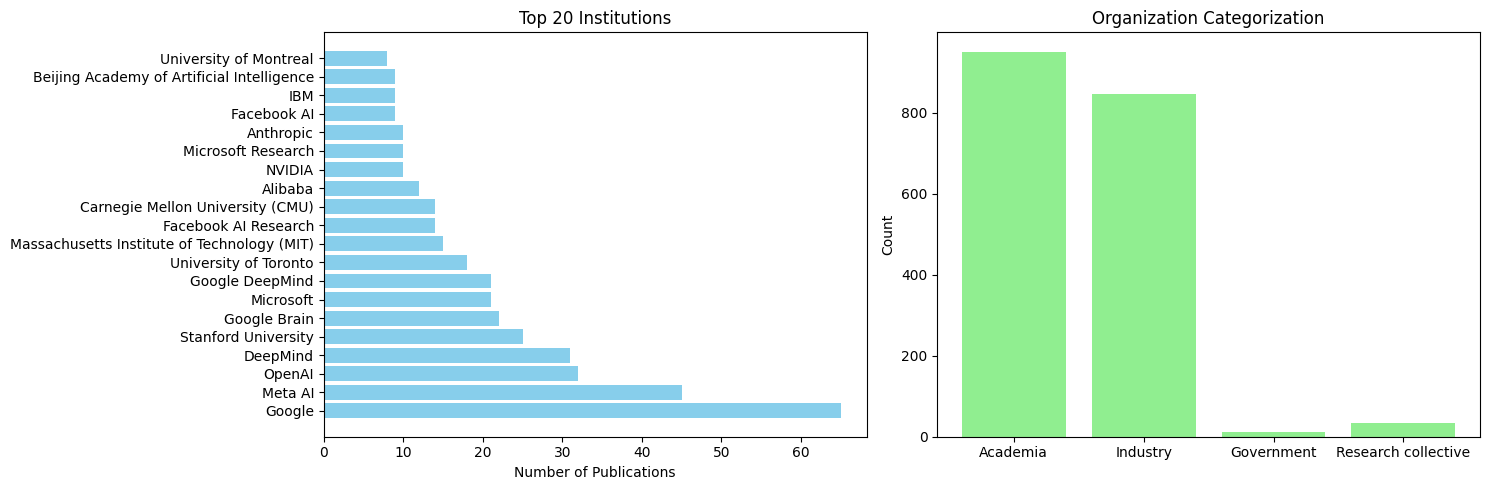

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import logging

logging.getLogger('matplotlib.font_manager').disabled = True # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv


pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

# filter out rows with missing values in 'Organization' or 'Organization categorization'
pcd_dataset = pcd_dataset.dropna(subset=['Organization', 'Organization categorization'])

all_categories = []
for categorization in pcd_dataset['Organization categorization']:
    categories = [cat.strip() for cat in categorization.split(',')]
    all_categories.extend(categories)

# counts each unique category
category_counts = Counter(all_categories)

plt.rcParams['font.family'] = 'Tinos'

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

top_20_institutions = pcd_dataset['Organization'].value_counts().head(20)

axs[0].barh(top_20_institutions.index, top_20_institutions.values, color='skyblue')
axs[0].set_xlabel('Number of Publications')
axs[0].set_title('Top 20 Institutions')

axs[1].bar(category_counts.keys(), category_counts.values(), color='lightgreen')
axs[1].set_ylabel('Count')
axs[1].set_title('Organization Categorization')

plt.tight_layout()
plt.show()



mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


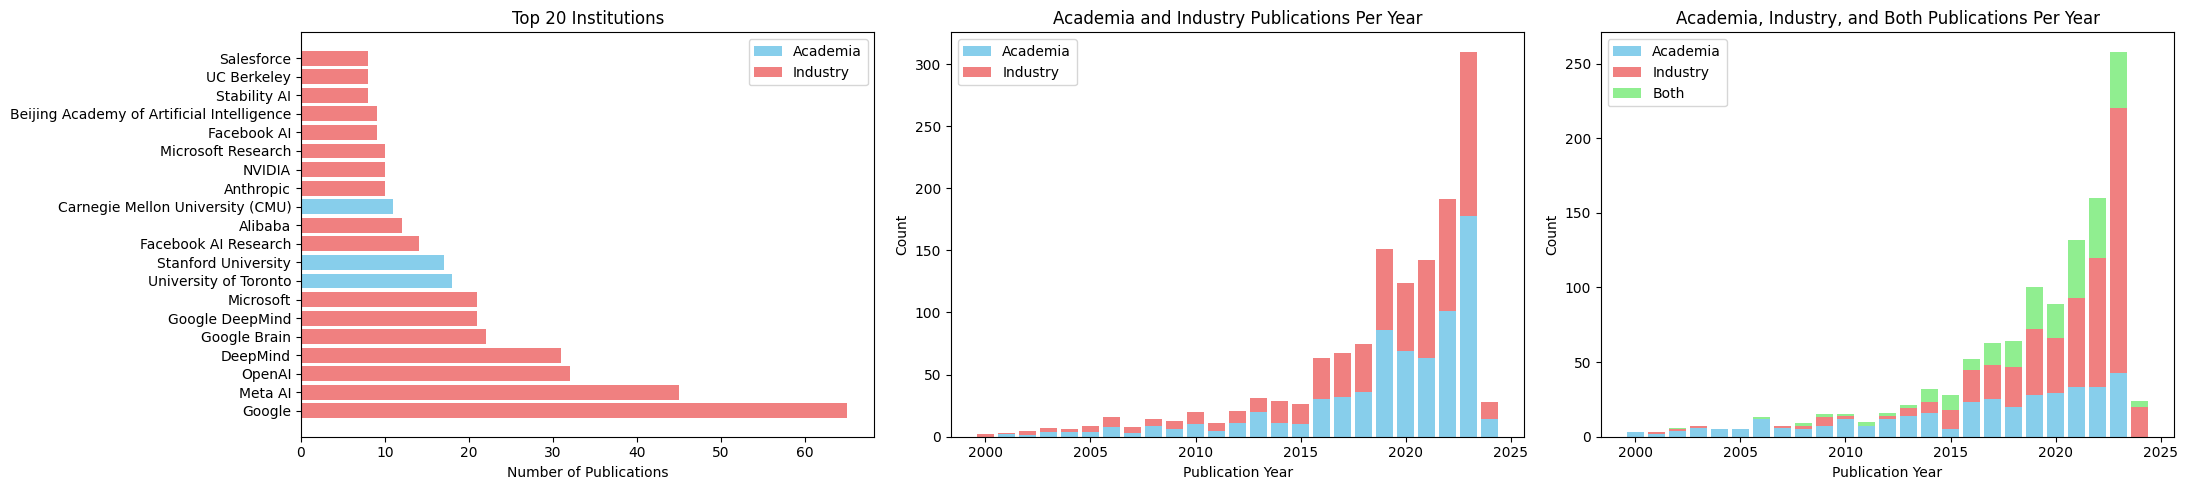

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import logging

logging.getLogger('matplotlib.font_manager').disabled = True # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv



pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

pcd_dataset = pcd_dataset.dropna(subset=['Organization', 'Organization categorization'])

pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

#  academia institutions
academia_institutions = ['University of Montreal', 'Carnegie Mellon University (CMU)',
                         'Massachusetts Institute of Technology (MIT)', 'University of Toronto',
                         'Stanford University']

pcd_dataset['Organization Type'] = pcd_dataset['Organization'].apply(lambda x: 'Academia' if x in academia_institutions else 'Industry')


## can alter the year we cap it at here by replacing 2000
pcd_dataset = pcd_dataset[pcd_dataset['Publication Year'] >= 2000]

plt.rcParams['font.family'] = 'Tinos'

fig, axs = plt.subplots(1, 3, figsize=(22, 5))

top_20_institutions = pcd_dataset['Organization'].value_counts().head(20)

# top 20 institutions

colors = ['skyblue' if inst in academia_institutions else 'lightcoral' for inst in top_20_institutions.index]
bars = axs[0].barh(top_20_institutions.index, top_20_institutions.values, color=colors)
axs[0].set_xlabel('Number of Publications')
axs[0].set_title('Top 20 Institutions')
academia_bar = plt.Rectangle((0,0),1,1,fc='skyblue', edgecolor = 'none')
industry_bar = plt.Rectangle((0,0),1,1,fc='lightcoral', edgecolor = 'none')
axs[0].legend([academia_bar, industry_bar], ['Academia', 'Industry'])

def count_categories(row):
    categories = [cat.strip() for cat in row['Organization categorization'].split(',')]
    return Counter(categories)

category_counts = pcd_dataset.apply(count_categories, axis=1)
category_counts_by_year = pd.DataFrame(list(category_counts)).fillna(0).groupby(pcd_dataset['Publication Year']).sum()

axs[1].bar(category_counts_by_year.index, category_counts_by_year['Academia'], label='Academia', color='skyblue')
axs[1].bar(category_counts_by_year.index, category_counts_by_year['Industry'], bottom=category_counts_by_year['Academia'], label='Industry', color='lightcoral')
axs[1].set_xlabel('Publication Year')
axs[1].set_ylabel('Count')
axs[1].set_title('Academia and Industry Publications Per Year')
axs[1].legend()

# counts of Academia, Industry, and Both per year
## I define both here: if string `academia' and string 'industry' is in cell it is both
pcd_dataset['Categorization'] = pcd_dataset.apply(lambda row: 'Both' if 'Academia' in row['Organization categorization'] and 'Industry' in row['Organization categorization'] else 'Academia' if 'Academia' in row['Organization categorization'] else 'Industry', axis=1)
categorization_counts_by_year = pcd_dataset.groupby('Publication Year')['Categorization'].value_counts().unstack(fill_value=0)

axs[2].bar(categorization_counts_by_year.index, categorization_counts_by_year['Academia'], label='Academia', color='skyblue')
axs[2].bar(categorization_counts_by_year.index, categorization_counts_by_year['Industry'], bottom=categorization_counts_by_year['Academia'], label='Industry', color='lightcoral')
axs[2].bar(categorization_counts_by_year.index, categorization_counts_by_year['Both'], bottom=categorization_counts_by_year['Academia'] + categorization_counts_by_year['Industry'], label='Both', color='lightgreen')
axs[2].set_xlabel('Publication Year')
axs[2].set_ylabel('Count')
axs[2].set_title('Academia, Industry, and Both Publications Per Year')
axs[2].legend()

plt.tight_layout()
plt.show()



2. Normalized Institution Data

mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


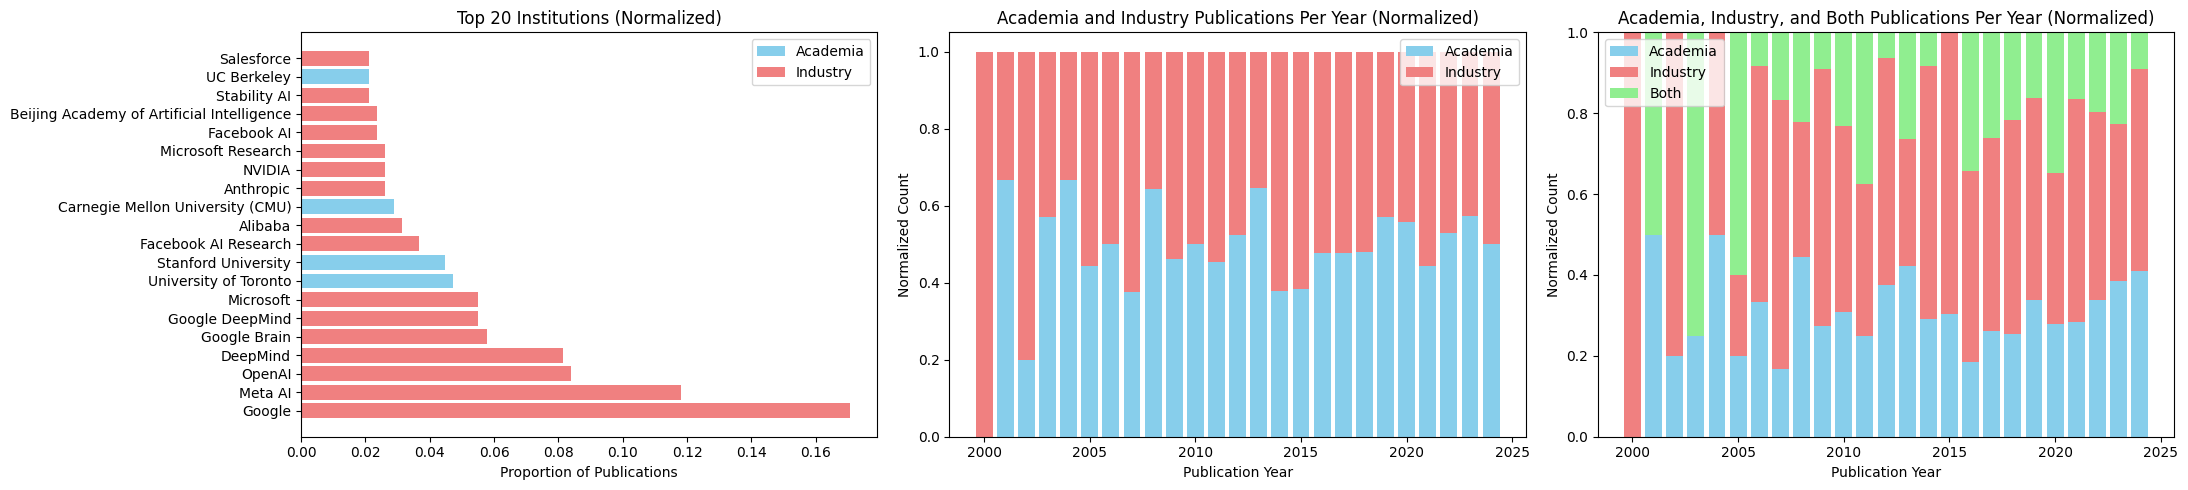

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


import logging

logging.getLogger('matplotlib.font_manager').disabled = True # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv


pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

pcd_dataset = pcd_dataset.dropna(subset=['Organization', 'Organization categorization'])

pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

## can alter the year we cap it at here by replacing 2000
pcd_dataset = pcd_dataset[pcd_dataset['Publication Year'] >= 2000]


academia_institutions = ['University of Montreal', 'Carnegie Mellon University (CMU)',
                         'Massachusetts Institute of Technology (MIT)', 'University of Toronto',
                         'Stanford University', 'UC Berkeley']

pcd_dataset['Organization Type'] = pcd_dataset['Organization'].apply(lambda x: 'Academia' if x in academia_institutions else 'Industry')
pcd_dataset['Categorization'] = pcd_dataset.apply(lambda row: 'Both' if 'Academia' in row['Organization categorization'] and 'Industry' in row['Organization categorization'] else 'Academia' if 'Academia' in row['Organization categorization'] else 'Industry', axis=1)

plt.rcParams['font.family'] = 'Tinos'

fig, axs = plt.subplots(1, 3, figsize=(22, 5))

# normalize top 20 institutions
total_institutions = top_20_institutions.sum()
normalized_top_20_institutions = top_20_institutions / total_institutions

colors = ['skyblue' if inst in academia_institutions else 'lightcoral' for inst in top_20_institutions.index]
bars = axs[0].barh(normalized_top_20_institutions.index, normalized_top_20_institutions.values, color=colors)
axs[0].set_xlabel('Proportion of Publications')
axs[0].set_title('Top 20 Institutions (Normalized)')
academia_bar = plt.Rectangle((0,0),1,1,fc='skyblue', edgecolor = 'none')
industry_bar = plt.Rectangle((0,0),1,1,fc='lightcoral', edgecolor = 'none')
axs[0].legend([academia_bar, industry_bar], ['Academia', 'Industry'])

def count_categories(row):
    categories = [cat.strip() for cat in row['Organization categorization'].split(',')]
    return Counter(categories)

category_counts = pcd_dataset.apply(count_categories, axis=1)
category_counts_by_year = pd.DataFrame(list(category_counts)).fillna(0).groupby(pcd_dataset['Publication Year']).sum()

def count_categorizations(row):
    return Counter([row['Categorization']])

categorization_counts = pcd_dataset.apply(count_categorizations, axis=1)
categorization_counts_by_year = pd.DataFrame(list(categorization_counts)).fillna(0).groupby(pcd_dataset['Publication Year']).sum()

# normalized: academia and industry publications per year
total_counts_by_year = category_counts_by_year['Academia'] + category_counts_by_year['Industry']
normalized_academia = category_counts_by_year['Academia'] / total_counts_by_year
normalized_industry = category_counts_by_year['Industry'] / total_counts_by_year

axs[1].bar(category_counts_by_year.index, normalized_academia, label='Academia', color='skyblue')
axs[1].bar(category_counts_by_year.index, normalized_industry, bottom=normalized_academia, label='Industry', color='lightcoral')
axs[1].set_xlabel('Publication Year')
axs[1].set_ylabel('Normalized Count')
axs[1].set_title('Academia and Industry Publications Per Year (Normalized)')
axs[1].legend()

# normalize academia, industry, and both publications per year
total_categorization_counts_by_year = categorization_counts_by_year['Academia'] + categorization_counts_by_year['Industry'] + categorization_counts_by_year['Both']
normalized_academia = categorization_counts_by_year['Academia'] / total_categorization_counts_by_year
normalized_industry = categorization_counts_by_year['Industry'] / total_categorization_counts_by_year
normalized_both = categorization_counts_by_year['Both'] / total_categorization_counts_by_year

axs[2].bar(categorization_counts_by_year.index, normalized_academia, label='Academia', color='skyblue')
axs[2].bar(categorization_counts_by_year.index, normalized_industry, bottom=normalized_academia, label='Industry', color='lightcoral')
axs[2].bar(categorization_counts_by_year.index, normalized_both, bottom=normalized_academia + normalized_industry, label='Both', color='lightgreen')
axs[2].set_xlabel('Publication Year')
axs[2].set_ylabel('Normalized Count')
axs[2].set_title('Academia, Industry, and Both Publications Per Year (Normalized)')
axs[2].legend()

plt.tight_layout()
plt.show()


3. Geography

New Update Mar 20: Corrected and put "Hong Kong" (which was seperate category) into China

mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


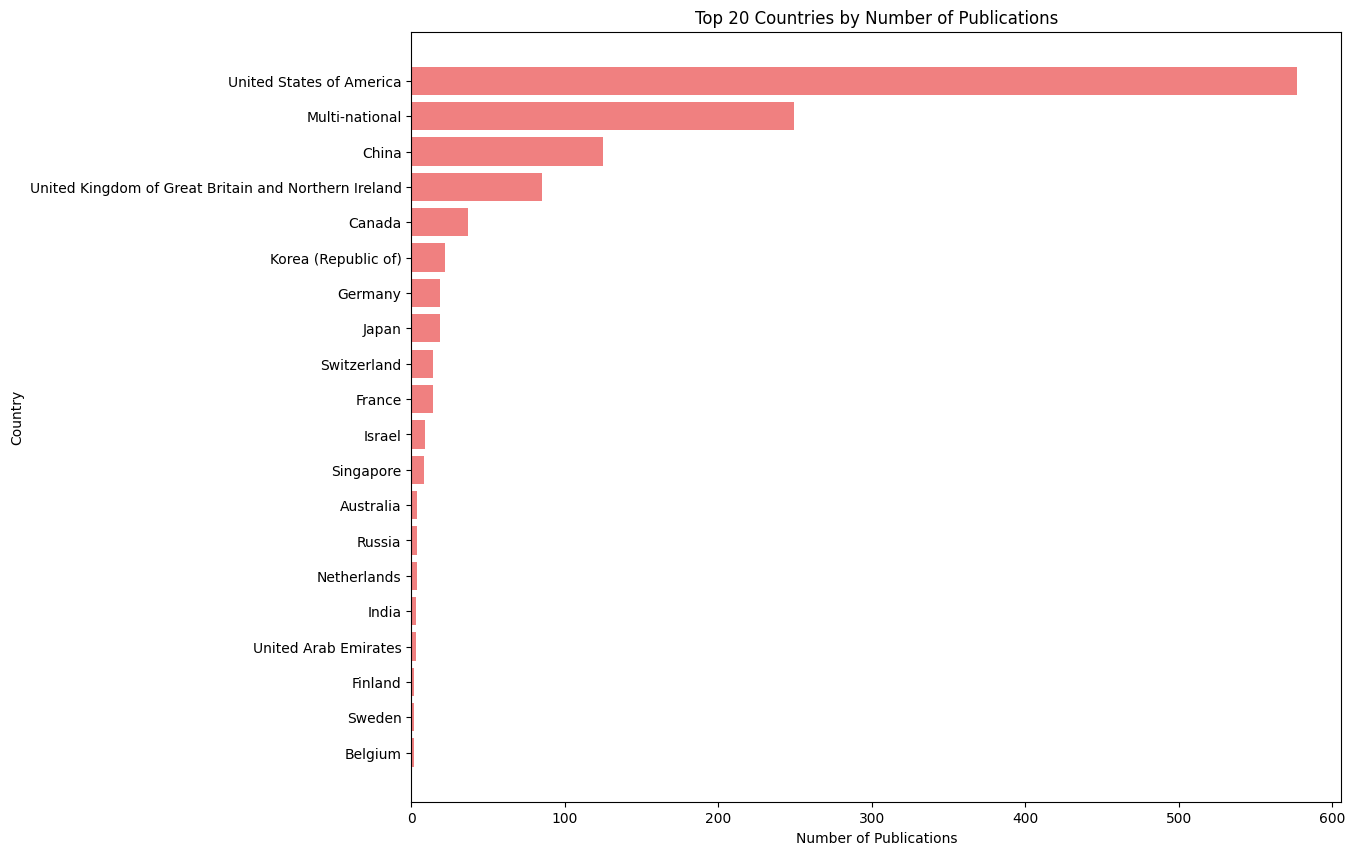

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
import logging

logging.getLogger('matplotlib.font_manager').disabled = True # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

def normalize_country_names(country_entry):
    if pd.isna(country_entry):
        return None
    # normalizes the United Kingdom variations
    country_entry = re.sub(r'United Kingdom.*', 'United Kingdom of Great Britain and Northern Ireland', country_entry)
    # replaces variations of 'multinational' with 'Multi-national'
    country_entry = re.sub(r'multi[-\s]*national', 'Multi-national', country_entry, flags=re.IGNORECASE)
    # new edit: maps 'Hong Kong' to 'China'
    country_entry = re.sub(r'Hong Kong', 'China', country_entry)
    countries = set(re.split(r'[,/]', country_entry))
    countries = {country.strip() for country in countries if country.strip()}
    # checks for multi-national (if there's more than one unique country or the standardized term 'Multi-national')
    if len(countries) > 1 or 'Multi-national' in countries:
        return 'Multi-national'
    return countries.pop()

pcd_dataset['Normalized Country'] = pcd_dataset['Country (from Organization)'].apply(normalize_country_names)

pcd_dataset = pcd_dataset.dropna(subset=['Normalized Country'])

top_countries = pcd_dataset['Normalized Country'].value_counts().head(20)

plt.figure(figsize=(12, 10))
plt.barh(top_countries.index, top_countries.values, color='lightcoral')
plt.xlabel('Number of Publications')
plt.ylabel('Country')
plt.title('Top 20 Countries by Number of Publications')
plt.gca().invert_yaxis()  # inverted the y-axis to have the highest count on top
plt.show()


4. Geography Normalized

mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


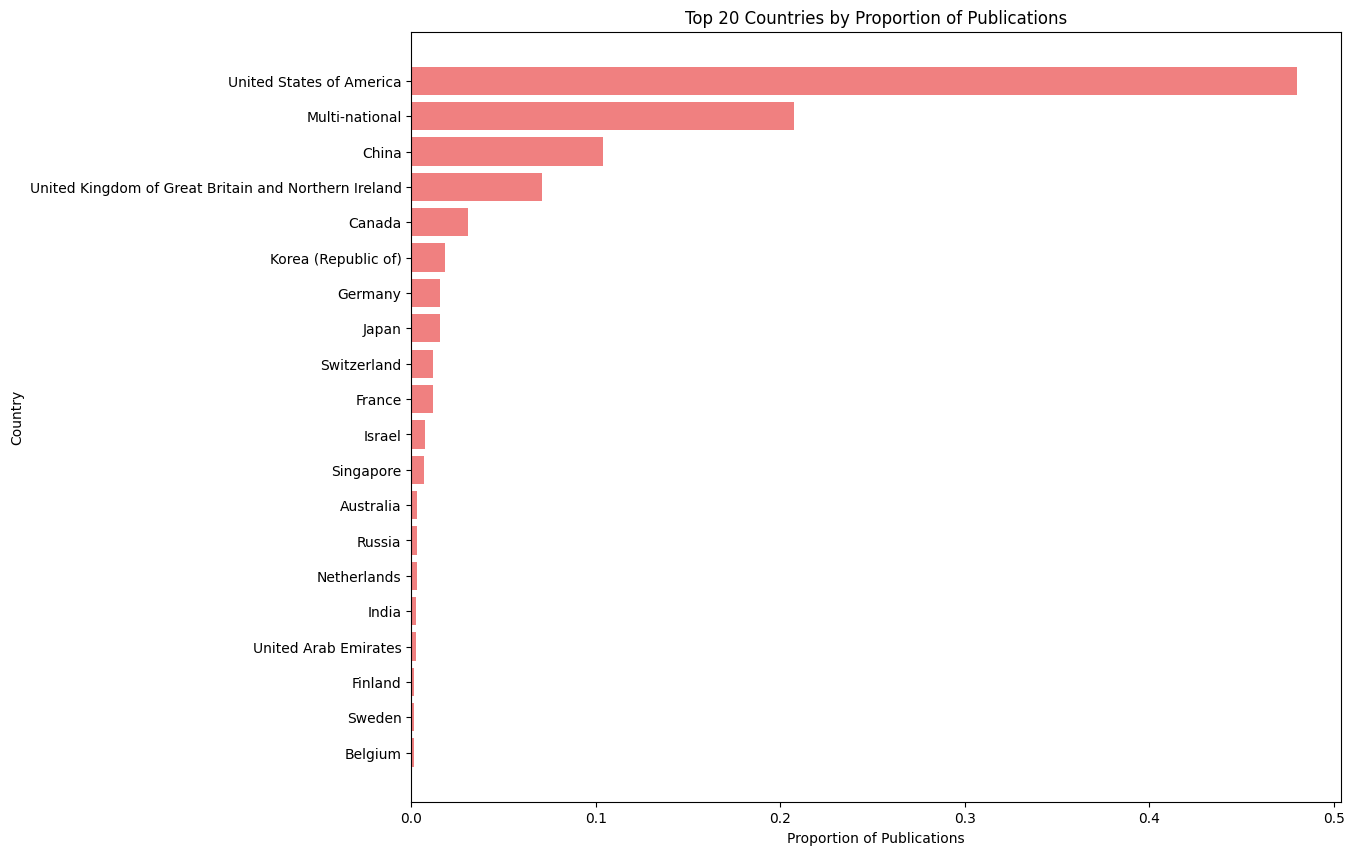

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
import logging
logging.getLogger('matplotlib.font_manager').disabled = True # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

def normalize_country_names(country_entry):
    if pd.isna(country_entry):
        return None
    # normalizes the United Kingdom variations
    country_entry = re.sub(r'United Kingdom.*', 'United Kingdom of Great Britain and Northern Ireland', country_entry)
    # replaces variations of 'multinational' with 'Multi-national'
    country_entry = re.sub(r'multi[-\s]*national', 'Multi-national', country_entry, flags=re.IGNORECASE)
    # new edit: maps 'Hong Kong' to 'China'
    country_entry = re.sub(r'Hong Kong', 'China', country_entry)
    countries = set(re.split(r'[,/]', country_entry))
    countries = {country.strip() for country in countries if country.strip()}
    # checks for multi-national (if there's more than one unique country or the standardized term 'Multi-national')
    if len(countries) > 1 or 'Multi-national' in countries:
        return 'Multi-national'
    return countries.pop()

pcd_dataset['Normalized Country'] = pcd_dataset['Country (from Organization)'].apply(normalize_country_names)

pcd_dataset = pcd_dataset.dropna(subset=['Normalized Country'])

top_countries = pcd_dataset['Normalized Country'].value_counts().head(20)

# gets the total number of publications
total_publications = top_countries.sum()

# normalized the data
top_countries_normalized = top_countries / total_publications

plt.figure(figsize=(12, 10))
plt.barh(top_countries_normalized.index, top_countries_normalized.values, color='lightcoral')
plt.xlabel('Proportion of Publications')
plt.ylabel('Country')
plt.title('Top 20 Countries by Proportion of Publications')
plt.gca().invert_yaxis()  # invert the y-axis to have the highest proportion on top
plt.show()


5. Open Source

mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


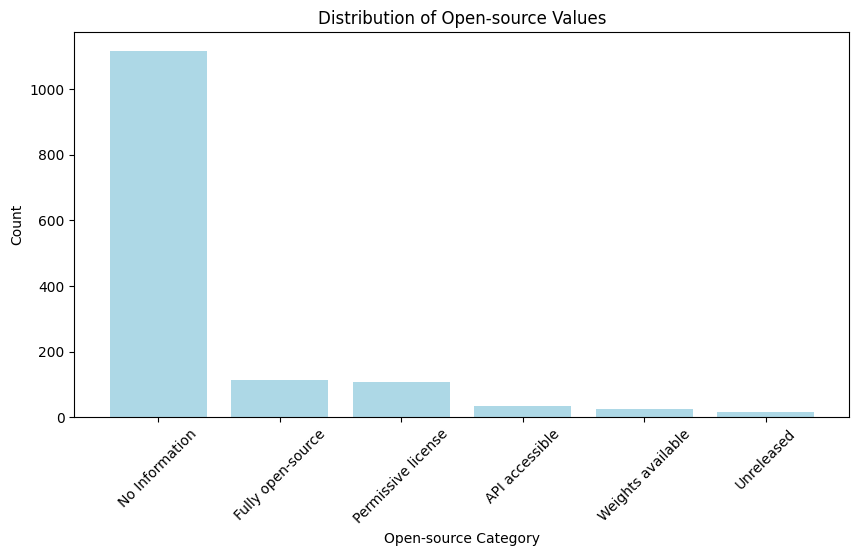

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")




# fills the empty cells in 'Open-source' column with 'No Information'
pcd_dataset['Open-source'] = pcd_dataset['Open-source'].fillna('No Information')

# counts the unique values in the 'Open-source' column
open_source_counts = pcd_dataset['Open-source'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(open_source_counts.index, open_source_counts.values, color='lightblue')
plt.xlabel('Open-source Category')
plt.ylabel('Count')
plt.title('Distribution of Open-source Values')
plt.xticks(rotation=45)
plt.show()


6. Open Source Over Time

mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


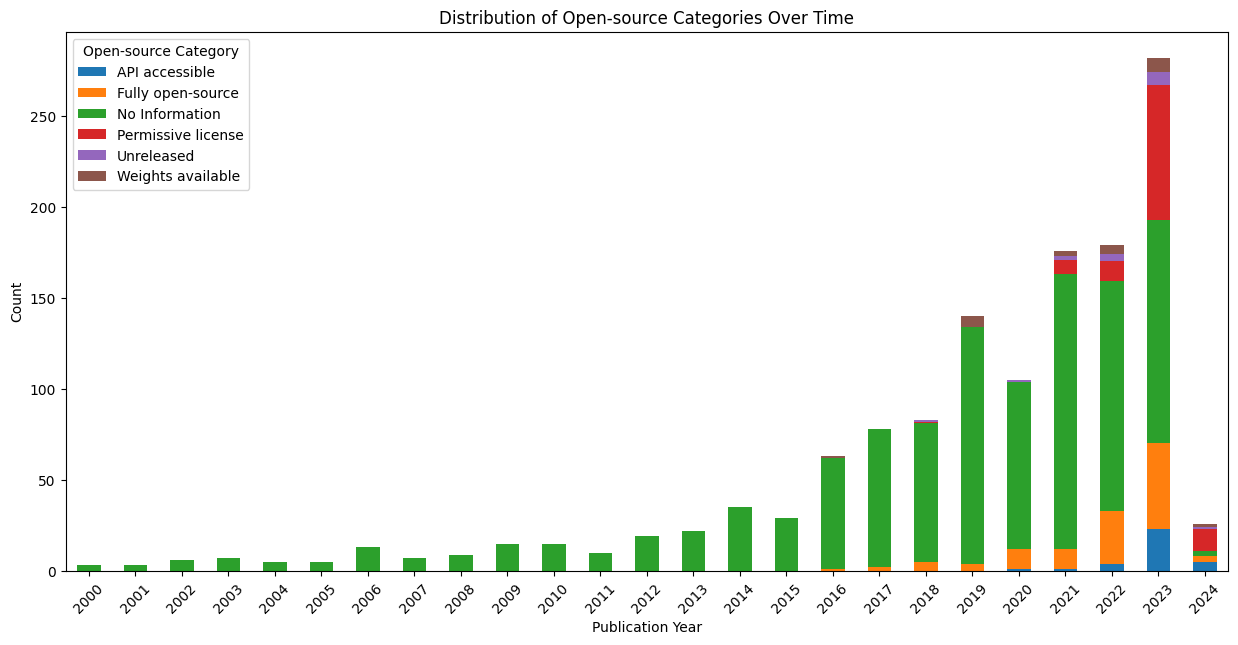

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

# fills empty cells in 'Open-source' column with 'No Information'
pcd_dataset['Open-source'] = pcd_dataset['Open-source'].fillna('No Information')

# gets the publication year
pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year


## can alter the year we cap it at here by replacing 2000
pcd_dataset = pcd_dataset[pcd_dataset['Publication Year'] >= 2000]

# groups by publication year and count the unique values in the 'Open-source' column for each year
open_source_counts_by_year = pcd_dataset.groupby('Publication Year')['Open-source'].value_counts().unstack(fill_value=0)

open_source_counts_by_year.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.title('Distribution of Open-source Categories Over Time')
plt.legend(title='Open-source Category')
plt.xticks(rotation=45)
plt.show()


7. Open Source Normalized Over Time

mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


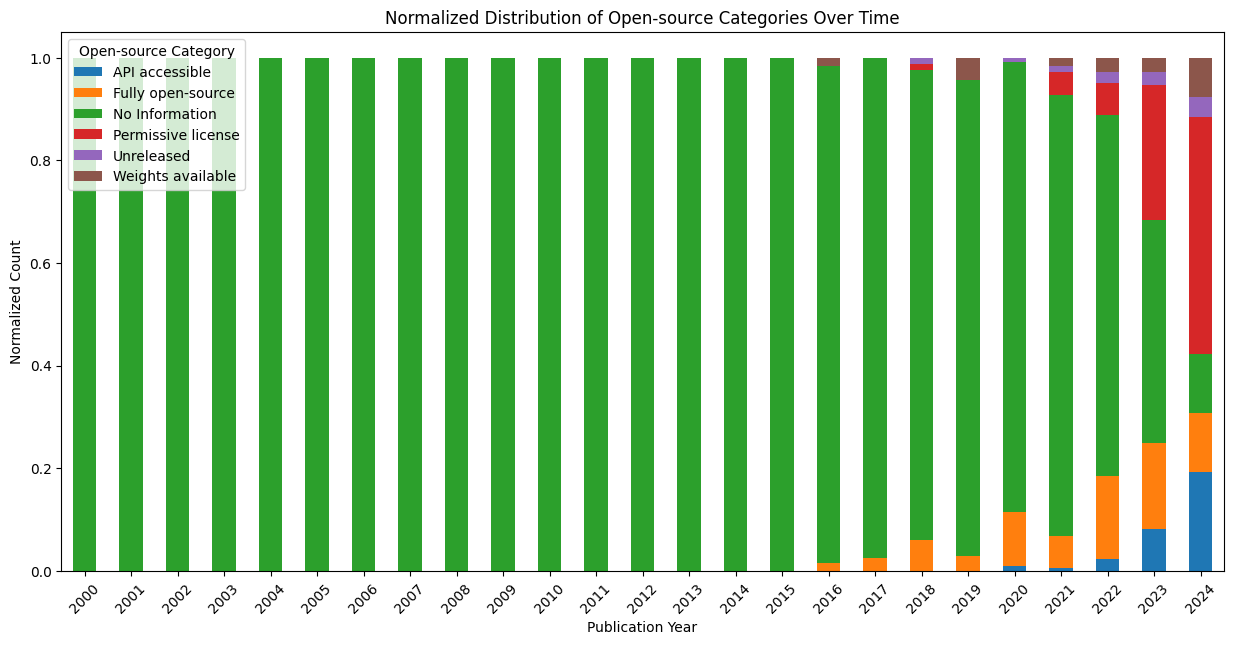

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

# fill empty cells in 'Open-source' column with 'No Information'
pcd_dataset['Open-source'] = pcd_dataset['Open-source'].fillna('No Information')

pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

## can alter the year we cap it at here by replacing 2000
pcd_dataset = pcd_dataset[pcd_dataset['Publication Year'] >= 2000]

open_source_counts_by_year = pcd_dataset.groupby('Publication Year')['Open-source'].value_counts().unstack(fill_value=0)

# normalize the data by the total count for each year
open_source_counts_by_year['total'] = open_source_counts_by_year.sum(axis=1)
for column in open_source_counts_by_year.columns[:-1]:  # exclude the 'total' column
    open_source_counts_by_year[column + '_normalized'] = open_source_counts_by_year[column] / open_source_counts_by_year['total']

normalized_columns = [col for col in open_source_counts_by_year.columns if '_normalized' in col]
open_source_counts_by_year[normalized_columns].plot(kind='bar', stacked=True, figsize=(15, 7))
plt.xlabel('Publication Year')
plt.ylabel('Normalized Count')
plt.title('Normalized Distribution of Open-source Categories Over Time')
plt.legend(title='Open-source Category', labels=[col.replace('_normalized', '') for col in normalized_columns])
plt.xticks(rotation=45)
plt.show()


8. Gender of Authors (according to classifier)

mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


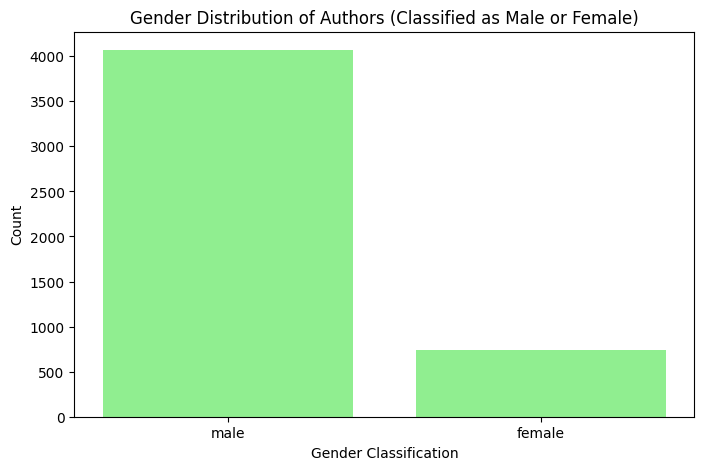

In [ ]:
import pandas as pd
!pip install gender_guesser
import gender_guesser.detector as gender
import matplotlib.pyplot as plt
from collections import Counter
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'


pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

# converts 'Publication date' to datetime and filter for records from 2000 onwards
pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year
pcd_dataset = pcd_dataset[pcd_dataset['Publication Year'] >= 2000]

detector = gender.Detector()

def get_first_name(full_name):
    parts = full_name.split()
    return parts[0] if parts else ""

def classify_gender(name):
    gender = detector.get_gender(name)
    if gender == "mostly_male":
        return "male"
    elif gender == "mostly_female":
        return "female"
    return gender

gender_distribution = []
for authors in pcd_dataset['Authors'].dropna():
    first_names = [get_first_name(author.strip()) for author in authors.split(',') if author.strip()]
    genders = [classify_gender(name) for name in first_names]
    gender_distribution.extend(genders)

gender_distribution = [gender for gender in gender_distribution if gender in ["male", "female"]]

gender_counts = Counter(gender_distribution)

plt.figure(figsize=(8, 5))
plt.bar(gender_counts.keys(), gender_counts.values(), color=['lightgreen', 'lightgreen'])
plt.xlabel('Gender Classification')
plt.ylabel('Count')
plt.title('Gender Distribution of Authors (Classified as Male or Female)')
plt.show()



9. Gender of Authors (according to classifier) Frequency

mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


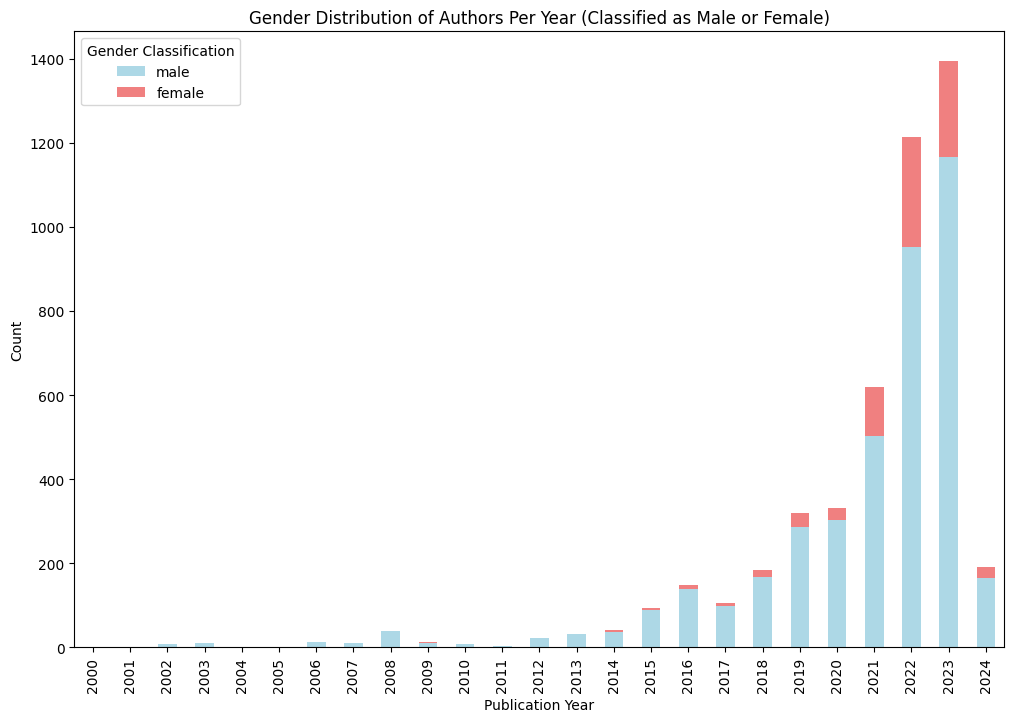

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install gender-guesser

import gender_guesser.detector as gender
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'


pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

detector = gender.Detector()

def get_first_name(full_name):
    parts = full_name.split()
    return parts[0] if parts else ""

def classify_gender(name):
    detected_gender = detector.get_gender(name)
    if detected_gender == "mostly_male":
        return "male"
    elif detected_gender == "mostly_female":
        return "female"
    return detected_gender

# gets the publication year
pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

# dictionary to store gender counts by year
gender_counts_by_year = {}

# count genders per year
for index, row in pcd_dataset.dropna(subset=['Authors', 'Publication Year']).iterrows():
    year = row['Publication Year']
    first_names = [get_first_name(author.strip()) for author in row['Authors'].split(',') if author.strip()]
    genders = [classify_gender(name) for name in first_names]
    gender_counts = {'male': 0, 'female': 0}
    for gender in genders:
        if gender in ['male', 'female']:
            gender_counts[gender] += 1
    if year not in gender_counts_by_year:
        gender_counts_by_year[year] = {'male': 0, 'female': 0}
    gender_counts_by_year[year]['male'] += gender_counts['male']
    gender_counts_by_year[year]['female'] += gender_counts['female']

# converts the dictionary to a DataFrame (easier plotting)
gender_counts_df = pd.DataFrame.from_dict(gender_counts_by_year, orient='index')

gender_counts_df.sort_index(inplace=True)

# filters out data before 2000
gender_counts_df = gender_counts_df[gender_counts_df.index >= 2000]

gender_counts_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=['lightblue', 'lightcoral'])
plt.xlabel('Publication Year')
plt.ylabel('Count')
plt.title('Gender Distribution of Authors Per Year (Classified as Male or Female)')
plt.legend(title='Gender Classification')
plt.show()


10. Gender Over Time Frequency--Normalized

mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


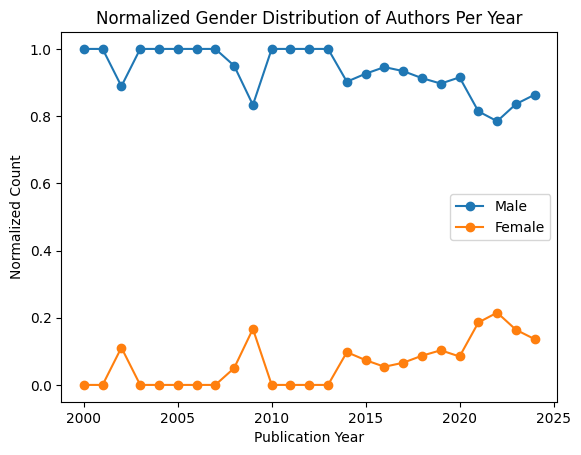

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install gender-guesser

import gender_guesser.detector as gender
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

detector = gender.Detector()

def get_first_name(full_name):
    parts = full_name.split()
    return parts[0] if parts else ""

def classify_gender(name):
    detected_gender = detector.get_gender(name)
    if detected_gender == "mostly_male":
        return "male"
    elif detected_gender == "mostly_female":
        return "female"
    return detected_gender

pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

gender_counts_by_year = {}

for index, row in pcd_dataset.dropna(subset=['Authors', 'Publication Year']).iterrows():
    year = row['Publication Year']
    first_names = [get_first_name(author.strip()) for author in row['Authors'].split(',') if author.strip()]
    genders = [classify_gender(name) for name in first_names]
    gender_counts = {'male': 0, 'female': 0}
    for gender in genders:
        if gender in ['male', 'female']:
            gender_counts[gender] += 1
    if year not in gender_counts_by_year:
        gender_counts_by_year[year] = {'male': 0, 'female': 0}
    gender_counts_by_year[year]['male'] += gender_counts['male']
    gender_counts_by_year[year]['female'] += gender_counts['female']

gender_counts_df = pd.DataFrame.from_dict(gender_counts_by_year, orient='index')

gender_counts_df.sort_index(inplace=True)

gender_counts_df = gender_counts_df[gender_counts_df.index >= 2000]

# normalize the data by the total number of authors each year
gender_counts_df['total'] = gender_counts_df['male'] + gender_counts_df['female']
gender_counts_df['male_normalized'] = gender_counts_df['male'] / gender_counts_df['total']
gender_counts_df['female_normalized'] = gender_counts_df['female'] / gender_counts_df['total']

plt.plot(gender_counts_df.index, gender_counts_df['male_normalized'], marker='o', linestyle='-', label='Male')
plt.plot(gender_counts_df.index, gender_counts_df['female_normalized'], marker='o', linestyle='-', label='Female')
plt.xlabel('Publication Year')
plt.ylabel('Normalized Count')
plt.title('Normalized Gender Distribution of Authors Per Year')
plt.legend()
plt.show()


# Get PDF URLs, Download PDFs, and Convert to Simple Text

# New Update Mar 20: Still produces substantially more papers than Nougat
Ran Nougat and it only increased papers by a few, kept running, kept increasing by a few. This method here still gives significantly more papers and I introduced some functions to clean up the data. Can also import Ana's scripts here for cleaning

In [ ]:
def get_pdf_url(link):
    if link.endswith(".pdf"):
        return link
    elif "arxiv.org" in link:
        return link.replace("abs", "pdf") + ".pdf"
    elif "nature.com" in link:
        # BeautifulSoup to find the PDF link on Nature pages
        response = requests.get(link)
        soup = BeautifulSoup(response.content, 'html.parser')
        pdf_link = soup.find('a', {'data-track-action': 'download pdf'})
        return pdf_link['href'] if pdf_link else None
    return None

def download_pdfs(dataset, column='Link', save_path='pdfs/'):
    """Download PDFs from the dataset."""
    failed_links = []
    for i, row in tqdm(dataset.iterrows(), total=len(dataset)):
        link = row[column]
        if pd.notnull(link):
            pdf_url = get_pdf_url(link)
            if pdf_url:
                file_name = f"{save_path}{row['System'].replace('/', '_')}.pdf"
                try:
                    response = requests.get(pdf_url)
                    if response.status_code == 200:
                        with open(file_name, 'wb') as f:
                            f.write(response.content)
                    else:
                        failed_links.append(pdf_url)
                except Exception as e:
                    print(f"Error downloading {pdf_url}: {e}")
                    failed_links.append(pdf_url)
            else:
                failed_links.append(link)

    if failed_links:
        print("\nFailed to download the following links:")
        for link in failed_links:
            print(link)

# Download PDFs
download_pdfs(pcd_dataset)


  3%|▎         | 40/1411 [00:24<14:19,  1.60it/s]

Error downloading /articles/s42003-023-05133-1.pdf: Invalid URL '/articles/s42003-023-05133-1.pdf': No scheme supplied. Perhaps you meant https:///articles/s42003-023-05133-1.pdf?


  9%|▊         | 123/1411 [01:19<11:05,  1.94it/s]

Error downloading http://machinelearning.wustl.edu/mlpapers/paper_files/AISTATS2011_GlorotBB11.pdf: HTTPConnectionPool(host='machinelearning.wustl.edu', port=80): Max retries exceeded with url: /mlpapers/paper_files/AISTATS2011_GlorotBB11.pdf (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x78fa5638ee00>: Failed to resolve 'machinelearning.wustl.edu' ([Errno -2] Name or service not known)"))


 14%|█▍        | 198/1411 [02:02<09:08,  2.21it/s]

Error downloading /articles/s41586-021-03819-2.pdf: Invalid URL '/articles/s41586-021-03819-2.pdf': No scheme supplied. Perhaps you meant https:///articles/s41586-021-03819-2.pdf?


 18%|█▊        | 253/1411 [02:49<16:29,  1.17it/s]

Error downloading /articles/s41746-021-00455-y.pdf: Invalid URL '/articles/s41746-021-00455-y.pdf': No scheme supplied. Perhaps you meant https:///articles/s41746-021-00455-y.pdf?


 26%|██▌       | 360/1411 [03:43<06:44,  2.60it/s]

Error downloading /articles/s41586-023-06747-5.pdf: Invalid URL '/articles/s41586-023-06747-5.pdf': No scheme supplied. Perhaps you meant https:///articles/s41586-023-06747-5.pdf?


 41%|████      | 578/1411 [05:50<07:58,  1.74it/s]

Error downloading /articles/s41467-019-11994-0.pdf: Invalid URL '/articles/s41467-019-11994-0.pdf': No scheme supplied. Perhaps you meant https:///articles/s41467-019-11994-0.pdf?


 44%|████▍     | 619/1411 [06:39<06:58,  1.89it/s]

Error downloading /articles/s41467-022-32007-7.pdf: Invalid URL '/articles/s41467-022-32007-7.pdf': No scheme supplied. Perhaps you meant https:///articles/s41467-022-32007-7.pdf?


 58%|█████▊    | 823/1411 [10:40<06:31,  1.50it/s]

Error downloading https://cs.nju.edu.cn/wujx/paper/AAAI2023_AFM.pdf: HTTPSConnectionPool(host='cs.nju.edu.cn', port=443): Max retries exceeded with url: /wujx/paper/AAAI2023_AFM.pdf (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1007)')))


 84%|████████▍ | 1186/1411 [12:56<01:15,  2.99it/s]

Error downloading /articles/s41586-023-06735-9.pdf: Invalid URL '/articles/s41586-023-06735-9.pdf': No scheme supplied. Perhaps you meant https:///articles/s41586-023-06735-9.pdf?


 90%|████████▉ | 1264/1411 [13:27<00:38,  3.84it/s]

Error downloading /articles/s41586-023-06419-4.pdf: Invalid URL '/articles/s41586-023-06419-4.pdf': No scheme supplied. Perhaps you meant https:///articles/s41586-023-06419-4.pdf?


100%|██████████| 1411/1411 [14:21<00:00,  1.64it/s]



Failed to download the following links:
https://pubmed.ncbi.nlm.nih.gov/19000969/
https://huggingface.co/karakuri-ai/karakuri-lm-70b-v0.1
https://www.aclweb.org/anthology/D12-1110/
https://www.semanticscholar.org/paper/Statistical-language-modeling-using-the-toolkit-Clarkson-Rosenfeld/fdf4aa623e4d5b5edaeb873ed8e8b1cef0b59c87
https://mp.weixin.qq.com/s/BUQWZ5EdR19i40GuFofpBg
https://openai.com/blog/image-gpt/
https://ieeexplore.ieee.org/abstract/document/7913730
https://jpn.nec.com/press/202307/20230706_02.html
https://www.adept.ai/blog/adept-fuyu-heavy
https://www.anthropic.com/index/introducing-claude
https://link.springer.com/article/10.1007/BF00337288
https://openai.com/blog/language-unsupervised/
https://engineering.linecorp.com/ja/blog/3.6-billion-parameter-japanese-language-model
http://www.lrec-conf.org/proceedings/lrec2022/pdf/2022.lrec-1.376.pdf

https://academic.oup.com/comjnl/article/6/3/232/360077
https://ieeexplore.ieee.org/document/6032006
https://www.microsoft.com/en-us

# Convert PDFs to text

In [ ]:
from google.colab import drive
from tqdm import tqdm
from PyPDF2 import PdfReader
import os

drive.mount('/content/drive')

def convert_pdfs_to_text(pdf_folder='pdfs/', text_folder='/content/drive/My Drive/TextPapers/'):
    """Convert PDFs in a folder to text files."""
    # Create the destination folder in Google Drive if it doesn't exist
    os.makedirs(text_folder, exist_ok=True)
    for pdf_file in tqdm(os.listdir(pdf_folder)):
        if pdf_file.endswith('.pdf'):
            try:
                reader = PdfReader(f"{pdf_folder}{pdf_file}")
                text = ""
                for page in reader.pages:
                    text += page.extract_text() + "\n"
                text_file = pdf_file.replace('.pdf', '.txt')
                with open(f"{text_folder}{text_file}", 'w', encoding='utf-8') as f:
                    f.write(text)
            except Exception as e:
                print(f"Error processing {pdf_file}: {e}")

# Convert PDFs to text
convert_pdfs_to_text()

Mounted at /content/drive


 17%|█▋        | 135/783 [03:30<12:53,  1.19s/it]

Error processing Context-dependent RNN.pdf: EOF marker not found


 22%|██▏       | 175/783 [04:27<19:08,  1.89s/it]

Error processing CODEFUSION (Python).pdf: EOF marker not found


 31%|███       | 241/783 [06:08<17:54,  1.98s/it]

Error processing RNN+LDA+KN5+cache.pdf: EOF marker not found


 53%|█████▎    | 412/783 [10:07<08:32,  1.38s/it]

Error processing Libratus.pdf: EOF marker not found


100%|██████████| 783/783 [19:07<00:00,  1.47s/it]


# Extract some information from text files
# New Update March 20: Good method to extract data from 700+ papers (more than I could download from Nougat) but extremely timely and needs to be optimized.

1. Data for whether model Created for Specific Domain (CS or climate change, etc.)?

In [ ]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import drive
from PyPDF2 import PdfReader
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'


from google.colab import drive
drive.mount('/content/drive')

# defined keywords for each field can add...
field_keywords = {
    'Computer Science': ['computer science', 'algorithm', 'machine learning', 'artificial intelligence', 'data structure'],
    'Robotics': ['robotics', 'robot', 'autonomous', 'manipulator', 'actuator'],
    'Climate Change': ['climate change', 'global warming', 'greenhouse gas', 'carbon dioxide', 'environmental'],
    'Healthcare': ['healthcare', 'medical', 'clinical', 'patient', 'disease'],
    'Finance': ['finance', 'financial', 'banking', 'investment', 'stock market'],
    'Autonomous Vehicles': ['autonomous vehicle', 'self-driving', 'driverless', 'automotive', 'vehicle navigation'],
    'Speech Recognition': ['speech recognition', 'speech processing', 'voice recognition', 'audio processing', 'acoustic model'],
}

# function to determine the field of a paper based on keywords
def determine_field(text, field_keywords):
    for field, keywords in field_keywords.items():
        for keyword in keywords:
            if keyword.lower() in text.lower():
                return field
    return 'Unknown'  # if no keywords match, return 'Unknown'

text_folder = '/content/drive/My Drive/TextPapers/'
field_counts = Counter()

for text_file in tqdm(os.listdir(text_folder)):
    if text_file.endswith('.txt'):
        with open(f"{text_folder}{text_file}", 'r', encoding='utf-8') as file:
            text = file.read()
            field = determine_field(text, field_keywords)
            field_counts[field] += 1

if 'Unknown' in field_counts:
    del field_counts['Unknown']

plt.figure(figsize=(10, 6))
plt.bar(field_counts.keys(), field_counts.values(), color='lightcoral')
plt.xlabel('Field')
plt.ylabel('Number of Papers')
plt.title('Distribution of Papers by Field')
plt.xticks(rotation=45)
plt.show()

2. More granular CS data task analysis
**Note**: This runs extremely fast because takes data straight from Epoch.

mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


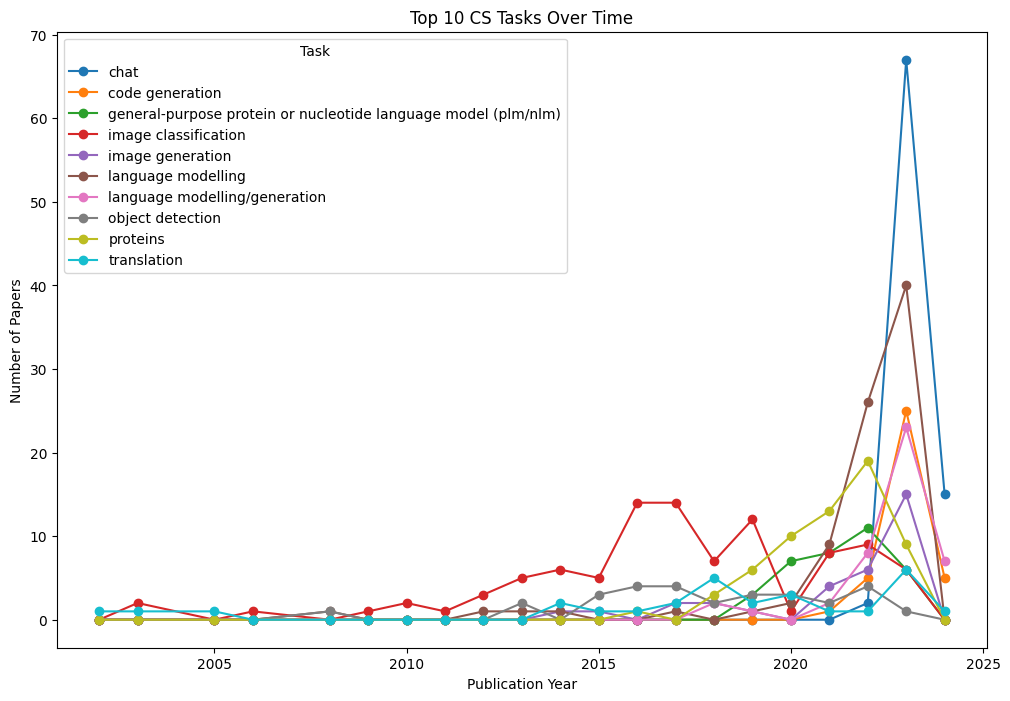

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

pcd_dataset = pcd_dataset[pcd_dataset['Publication Year'] >= 2000]


pcd_dataset['Tasks'] = pcd_dataset['Task'].str.split(',')

# explode the dataset to have one task per row
exploded_dataset = pcd_dataset.explode('Tasks')

# clean up the task names
exploded_dataset['Tasks'] = exploded_dataset['Tasks'].str.strip().str.lower()

top_10_tasks = exploded_dataset['Tasks'].value_counts().head(10).index.tolist()

top_tasks_dataset = exploded_dataset[exploded_dataset['Tasks'].isin(top_10_tasks)]

task_counts_by_year = top_tasks_dataset.groupby(['Publication Year', 'Tasks']).size().unstack(fill_value=0)

task_counts_by_year.plot(kind='line', figsize=(12, 8), marker='o')
plt.xlabel('Publication Year')
plt.ylabel('Number of Papers')
plt.title('Top 10 CS Tasks Over Time')
plt.legend(title='Task')
plt.show()


3. More granular CS task data -- normalized

mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


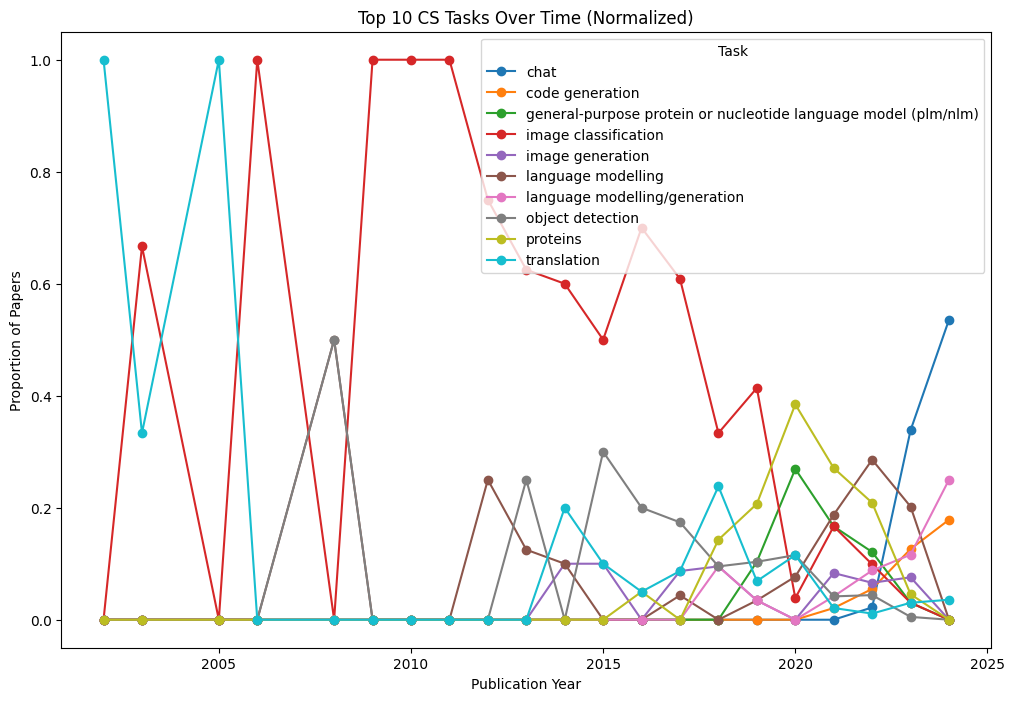

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

pcd_dataset = pcd_dataset[pcd_dataset['Publication Year'] >= 2000]

pcd_dataset['Tasks'] = pcd_dataset['Task'].str.split(',')

exploded_dataset = pcd_dataset.explode('Tasks')

exploded_dataset['Tasks'] = exploded_dataset['Tasks'].str.strip().str.lower()

top_10_tasks = exploded_dataset['Tasks'].value_counts().head(10).index.tolist()

top_tasks_dataset = exploded_dataset[exploded_dataset['Tasks'].isin(top_10_tasks)]

task_counts_by_year = top_tasks_dataset.groupby(['Publication Year', 'Tasks']).size().unstack(fill_value=0)

total_counts_by_year = task_counts_by_year.sum(axis=1)
normalized_task_counts_by_year = task_counts_by_year.div(total_counts_by_year, axis=0)

normalized_task_counts_by_year.plot(kind='line', figsize=(12, 8), marker='o')
plt.xlabel('Publication Year')
plt.ylabel('Proportion of Papers')
plt.title('Top 10 CS Tasks Over Time (Normalized)')
plt.legend(title='Task')
plt.show()


4. Ethics of AI: Ethical considerations

100%|██████████| 780/780 [00:05<00:00, 137.63it/s]


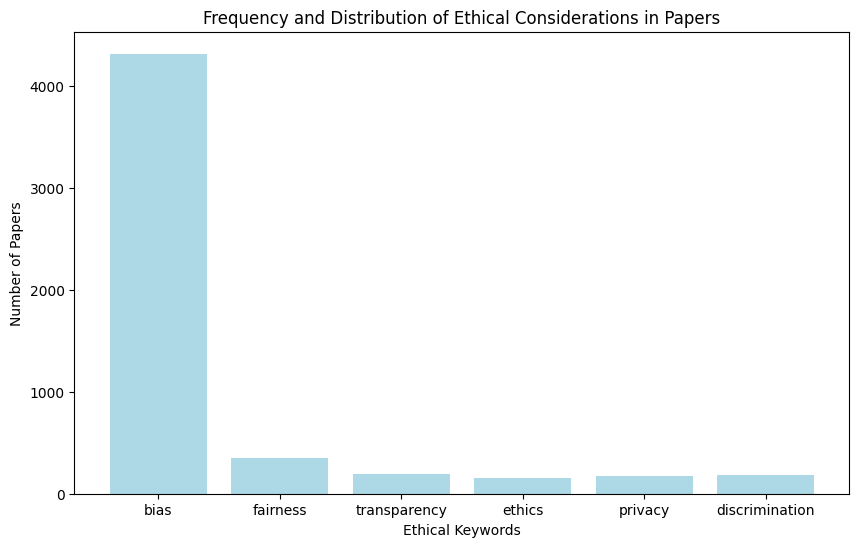

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'
# defines the specific ethical keywords of interest
ethical_keywords = ['bias', 'fairness', 'transparency', 'ethics', 'privacy', 'discrimination']

def count_ethical_keywords(text, ethical_keywords):
    counts = {keyword: text.lower().count(keyword.lower()) for keyword in ethical_keywords}
    return counts

text_folder = '/content/drive/My Drive/TextPapers/'
ethical_counts = Counter()

for text_file in tqdm(os.listdir(text_folder)):
    if text_file.endswith('.txt'):
        with open(f"{text_folder}{text_file}", 'r', encoding='utf-8') as file:
            text = file.read()
            counts = count_ethical_keywords(text, ethical_keywords)
            ethical_counts.update(counts)

plt.figure(figsize=(10, 6))
plt.bar(ethical_counts.keys(), ethical_counts.values(), color='lightblue')
plt.xlabel('Ethical Keywords')
plt.ylabel('Number of Papers')
plt.title('Frequency and Distribution of Ethical Considerations in Papers')
plt.show()



In [ ]:
# ### side by side in Times New Roman ### this doesn't run due to crashing -- memory issue

# from google.colab import drive
# drive.mount('/content/drive')

# !pip install fuzzywuzzy[speedup]
# import pandas as pd
# import os
# from collections import Counter
# import spacy
# from nltk.corpus import stopwords
# import nltk
# from fuzzywuzzy import process
# import matplotlib.pyplot as plt
# !pip install wordninja

# import wordninja

# nltk.download('stopwords')

# nlp = spacy.load("en_core_web_sm")

# stop_words = set(stopwords.words('english')).union({'et', 'al'})

# def is_real_word(word):
#     """Checks if a word is a real word by splitting it and checking if the split parts are in the English dictionary."""
#     split_words = wordninja.split(word)
#     return all(split_word in nlp.vocab for split_word in split_words)

# def perform_keyword_analysis(text):
#     """Performs keyword analysis on text, using lemmatization and excluding stopwords and non-real words."""
#     nlp.max_length = len(text) + 10000
#     doc = nlp(text)
#     lemmas = [token.lemma_.lower() for token in doc if token.lemma_ not in stop_words and token.pos_ != 'PUNCT' and not token.lemma_.isdigit() and len(token.lemma_) > 1 and not token.lemma_.startswith('/')]
#     filtered_lemmas = [lemma for lemma in lemmas if is_real_word(lemma)]
#     lemma_freq = Counter(filtered_lemmas)
#     return lemma_freq.most_common()

# def find_best_match(name, choices, threshold=80):
#     """Gets the best match for a given name from a list of choices, with a minimum similarity threshold."""
#     match = process.extractOne(name, choices)
#     if match:
#         best_match, score, _ = match
#         if score >= threshold:
#             return best_match
#     return None

# pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

# # Step 1: Get publication year
# pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

# # Preprocess the System names in the dataset
# processed_system_names = pcd_dataset['System'].str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

# # Step 2: Group text files by publication year
# text_files_by_year = {}
# text_folder = '/content/drive/My Drive/TextPapers/'
# for text_file in os.listdir(text_folder):
#     article_name = text_file.replace('.txt', '').replace('_', ' ')
#     best_match = find_best_match(article_name, processed_system_names)
#     if best_match is None:
#         print(f"Warning: No matching entry found in dataset for text file '{text_file}'")
#         continue
#     year = pcd_dataset[processed_system_names == best_match]['Publication Year'].values[0]
#     if year not in text_files_by_year:
#         text_files_by_year[year] = []
#     with open(f'{text_folder}{text_file}', 'r', encoding='utf-8') as f:
#         text_content = f.read()
#         text_files_by_year[year].append(text_content)

# # Step 3: Keyword analysis for each year
# keywords_by_year = {}
# papers_count_by_year = {}
# for year, texts in text_files_by_year.items():
#     all_text = ' '.join(texts)
#     keywords_by_year[year] = perform_keyword_analysis(all_text)
#     papers_count_by_year[year] = len(texts)

# # identify the top 10 keywords across all years
# all_keywords_freq = Counter()
# for year, keywords in keywords_by_year.items():
#     all_keywords_freq.update(dict(keywords))
# top_10_keywords = [keyword for keyword, _ in all_keywords_freq.most_common(10)]

# top_keywords_freq_by_year = {year: {keyword: 0 for keyword in top_10_keywords} for year in sorted(keywords_by_year.keys())}
# for year, keywords in keywords_by_year.items():
#     year_keywords_freq = dict(keywords)
#     for keyword in top_10_keywords:
#         top_keywords_freq_by_year[year][keyword] = year_keywords_freq.get(keyword, 0)

# # new format
# plt.rcParams['font.family'] = 'Times New Roman'
# fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# # plot the first graph (Top 10 Keywords in All Papers)
# keyword_analysis, total_keywords = perform_keyword_analysis(text_folder)
# top_keywords = keyword_analysis[:10]
# keywords, counts = zip(*top_keywords)
# keywords = list(keywords)
# counts = list(counts)
# axs[0].barh(keywords, counts)
# axs[0].set_xlabel('Frequency')
# axs[0].set_title('Top 10 Keywords in All Papers')
# axs[0].invert_yaxis()  # Invert y-axis to display the highest frequency at the top

# # plot the second graph (Top 10 Keywords Frequency Trend Over Time)
# for keyword in top_10_keywords:
#     axs[1].plot(list(top_keywords_freq_by_year.keys()), [top_keywords_freq_by_year[year][keyword] for year in sorted(top_keywords_freq_by_year.keys())], label=keyword)
# axs[1].set_xlabel('Year')
# axs[1].set_ylabel('Frequency')
# axs[1].set_title('Top 10 Keywords Frequency Trend Over Time')
# axs[1].legend()
# axs[1].grid(True)

# plt.tight_layout()
# plt.show()

# total_papers_analyzed = sum(papers_count_by_year.values())
# print(f"Total papers analyzed: {total_papers_analyzed}")

# for year, count in papers_count_by_year.items():
#     print(f"Year {year}: {count} papers analyzed")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from tqdm import tqdm
from collections import Counter
from nltk.corpus import stopwords
import spacy
import os
import matplotlib.pyplot as plt
!pip install wordninja
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

import wordninja

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

def is_real_word(word):
    """Checks if a word is a real word by splitting it and checking if the split parts are in the English dictionary."""
    split_words = wordninja.split(word)
    return all(split_word in nlp.vocab for split_word in split_words)

def perform_keyword_analysis(text_folder='/content/drive/My Drive/TextPapers/'):
    """Perform keyword analysis on text files, using lemmatization to reduce words to their base form and excluding non-real words."""
    stop_words = set(stopwords.words('english')).union({'et', 'al'})
    keyword_counts = Counter()
    for text_file in tqdm(os.listdir(text_folder)):
        if text_file.endswith('.txt'):
            with open(f"{text_folder}{text_file}", 'r', encoding='utf-8') as f:
                text = f.read().lower()
                doc = nlp(text)
                lemmas = [token.lemma_ for token in doc if token.lemma_ not in stop_words and len(token.lemma_) > 1 and not token.lemma_.startswith('/') and not token.lemma_.isdigit()]
                filtered_lemmas = [lemma for lemma in lemmas if is_real_word(lemma)]
                keyword_counts.update(filtered_lemmas)
    total_keywords = len(keyword_counts)
    return keyword_counts.most_common(), total_keywords

keyword_analysis, total_keywords = perform_keyword_analysis()
top_keywords = keyword_analysis[:10]
print(f"Top 10 keywords: {top_keywords}")
print(f"Total number of unique keywords assessed: {total_keywords}")

# Create a horizontal bar plot for the top keywords
keywords, counts = zip(*top_keywords)
keywords = list(keywords)
counts = list(counts)
plt.figure(figsize=(12, 8))
plt.barh(keywords, counts)
plt.ylabel('Keywords')
plt.xlabel('Frequency')
plt.title('Top 10 Keywords in All Papers')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest frequency at the top
plt.show()




In [ ]:
from tqdm import tqdm
from collections import Counter
from nltk.corpus import stopwords
import spacy
import os
import matplotlib.pyplot as plt
!pip install wordninja
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

import wordninja

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

def is_real_word(word):
    """Checks if a word is a real word by splitting it and checking if the split parts are in the English dictionary."""
    split_words = wordninja.split(word)
    return all(split_word in nlp.vocab for split_word in split_words)

def perform_keyword_analysis(text_folder='/content/drive/My Drive/TextPapers/'):
    """Perform keyword analysis on text files, using lemmatization to reduce words to their base form and excluding non-real words."""
    stop_words = set(stopwords.words('english')).union({'et', 'al'})
    keyword_counts = Counter()
    total_papers = 0
    for text_file in tqdm(os.listdir(text_folder)):
        if text_file.endswith('.txt'):
            total_papers += 1
            with open(f"{text_folder}{text_file}", 'r', encoding='utf-8') as f:
                text = f.read().lower()
                doc = nlp(text)
                lemmas = [token.lemma_ for token in doc if token.lemma_ not in stop_words and len(token.lemma_) > 1 and not token.lemma_.startswith('/') and not token.lemma_.isdigit()]
                filtered_lemmas = [lemma for lemma in lemmas if is_real_word(lemma)]
                keyword_counts.update(filtered_lemmas)
    total_keywords = len(keyword_counts)
    return keyword_counts.most_common(), total_keywords, total_papers

keyword_analysis, total_keywords, total_papers = perform_keyword_analysis()
top_keywords = keyword_analysis[:10]
print(f"Top 10 keywords: {top_keywords}")
print(f"Total number of unique keywords assessed: {total_keywords}")
print(f"Total number of papers analyzed: {total_papers}")

# bar plot for the top keywords (absolute frequency)
keywords, counts = zip(*top_keywords)
keywords = list(keywords)
counts = list(counts)
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.barh(keywords, counts)
plt.ylabel('Keywords')
plt.xlabel('Frequency (Absolute)')
plt.title('Top 10 Keywords Frequency (Absolute)')
plt.gca().invert_yaxis()

# new add: bar plot for the top keywords (relative frequency)
relative_counts = [count / total_papers * 100 for count in counts]
plt.subplot(1, 2, 2)
plt.barh(keywords, relative_counts)
plt.ylabel('Keywords')
plt.xlabel('Frequency (Relative %)')
plt.title('Top 10 Keywords Frequency (Relative %)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


# Keyword Extraction over time

Question: What is the frequency of the top keywords over time?
(I combine this into

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install fuzzywuzzy[speedup]
import pandas as pd
import os
from collections import Counter
import spacy
from nltk.corpus import stopwords
import nltk
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import wordninja
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")

stop_words = set(stopwords.words('english')).union({'et', 'al'})

def is_real_word(word):
    """Checks if a word is a real word by splitting it and checking if the split parts are in the English dictionary."""
    split_words = wordninja.split(word)
    return all(split_word in nlp.vocab for split_word in split_words)

def perform_keyword_analysis(text):
    """Performs keyword analysis on text, using lemmatization and excluding stopwords and non-real words."""
    nlp.max_length = len(text) + 10000
    doc = nlp(text)
    lemmas = [token.lemma_.lower() for token in doc if token.lemma_ not in stop_words and token.pos_ != 'PUNCT' and not token.lemma_.isdigit() and len(token.lemma_) > 1 and not token.lemma_.startswith('/')]
    filtered_lemmas = [lemma for lemma in lemmas if is_real_word(lemma)]
    lemma_freq = Counter(filtered_lemmas)
    return lemma_freq.most_common()

def find_best_match(name, choices, threshold=80):
    """Gets the best match for a given name from a list of choices, with a minimum similarity threshold."""
    match = process.extractOne(name, choices)
    if match:
        best_match, score, _ = match
        if score >= threshold:
            return best_match
    return None

pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")

# Step 1: Get publication year
pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

# preprocess the System names in the dataset
processed_system_names = pcd_dataset['System'].str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

# Step 2: Group text files by publication year
text_files_by_year = {}
text_folder = '/content/drive/My Drive/TextPapers/'
for text_file in os.listdir(text_folder):
    article_name = text_file.replace('.txt', '').replace('_', ' ')
    best_match = find_best_match(article_name, processed_system_names)
    if best_match is None:
        print(f"Warning: No matching entry found in dataset for text file '{text_file}'")
        continue
    year = pcd_dataset[processed_system_names == best_match]['Publication Year'].values[0]
    if year not in text_files_by_year:
        text_files_by_year[year] = []
    with open(f'{text_folder}{text_file}', 'r', encoding='utf-8') as f:
        text_content = f.read()
        text_files_by_year[year].append(text_content)

# Step 3: Keyword analysis for each year
keywords_by_year = {}
papers_count_by_year = {}
for year, texts in text_files_by_year.items():
    all_text = ' '.join(texts)
    keywords_by_year[year] = perform_keyword_analysis(all_text)
    papers_count_by_year[year] = len(texts)

# gets the top 10 keywords across all years
all_keywords_freq = Counter()
for year, keywords in keywords_by_year.items():
    all_keywords_freq.update(dict(keywords))
top_10_keywords = [keyword for keyword, _ in all_keywords_freq.most_common(10)]

# tracks the frequency of the top 10 keywords over each year
top_keywords_freq_by_year = {year: {keyword: 0 for keyword in top_10_keywords} for year in sorted(keywords_by_year.keys())}
for year, keywords in keywords_by_year.items():
    year_keywords_freq = dict(keywords)
    for keyword in top_10_keywords:
        top_keywords_freq_by_year[year][keyword] = year_keywords_freq.get(keyword, 0)

plt.figure(figsize=(12, 8))
for keyword in top_10_keywords:
    plt.plot(list(top_keywords_freq_by_year.keys()), [top_keywords_freq_by_year[year][keyword] for year in sorted(top_keywords_freq_by_year.keys())], label=keyword)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Top 10 Keywords Frequency Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()

# total papers analyzed
total_papers_analyzed = sum(papers_count_by_year.values())
print(f"Total papers analyzed: {total_papers_analyzed}")

# papers analyzed per year
for year, count in papers_count_by_year.items():
    print(f"Year {year}: {count} papers analyzed")



In [ ]:
import matplotlib.pyplot as plt
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

# absolute frequency of the top 10 keywords over time
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
for keyword in top_10_keywords:
    plt.plot(list(top_keywords_freq_by_year.keys()), [top_keywords_freq_by_year[year][keyword] for year in sorted(top_keywords_freq_by_year.keys())], label=keyword)
plt.xlabel('Year')
plt.ylabel('Frequency (Absolute)')
plt.title('Top 10 Keywords Frequency Trend Over Time (Absolute)')
plt.legend()
plt.grid(True)

# relative frequency of the top 10 keywords over time
plt.subplot(1, 2, 2)
for keyword in top_10_keywords:
    plt.plot(list(top_keywords_freq_by_year.keys()), [top_keywords_freq_by_year[year][keyword] / papers_count_by_year[year] * 100 for year in sorted(top_keywords_freq_by_year.keys())], label=keyword)
plt.xlabel('Year')
plt.ylabel('Frequency (Relative %)')
plt.title('Top 10 Keywords Frequency Trend Over Time (Relative %)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


# New Plots Frequency Over Time for Themes

> March 20: subplots for themes new plots here from 2000 onwards and only prints the informative ones

takes very long time to run >hour

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.6/541.6 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541530 sha256=eaf7173a29c6f9bda5ee52f7ab46ce839f5ed1ee3ac176e4a54d5b314f642777
  Stored in directory: /root/.cache/pip/wheels/aa/44/3a/f2a5c1859b8b541ded969b4cd12d0a58897f12408f4f51e084
Successfully built wordninja
mv: cannot stat 'Tinos-Regular.ttf': No such file or directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching,

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
 11%|█         | 87/780 [09:12<55:08,  4.77s/it]  

 16%|█▌        | 125/780 [13:16<46:31,  4.26s/it]

 19%|█▉        | 151/780 [16:07<1:10:44,  6.75s/it]

 23%|██▎       | 177/780 [19:03<1:08:43,  6.84s/it]

 29%|██▊       | 223/780 [23:47<58:45,  6.33s/it]  

 32%|███▏      | 253/780 [27:26<1:15:14,  8.57s/it]

 41%|████      | 320/780 [35:05<1:20:43, 10.53s/it]

 43%|████▎     | 337/780 [36:24<39:19,  5.33s/it]

 46%|████▌     | 355/780 [38:17<49:59,  7.06s/it]

 62%|██████▏   | 486/780 [52:34<32:09,  6.56s/it]

 70%|███████   | 548/780 [1:01:28<35:22,  9.15s/it]

 73%|███████▎  | 571/780 [1:04:21<50:43, 14.56s/it]

 87%|████████▋ | 677/780 [1:15:42<08:41,  5.06s/it]

 88%|████████▊ | 686/780 [1:16:26<09:02,  5.77s/it]

100%|██████████| 780/780 [1:26:49<00:00,  6.68s/it]


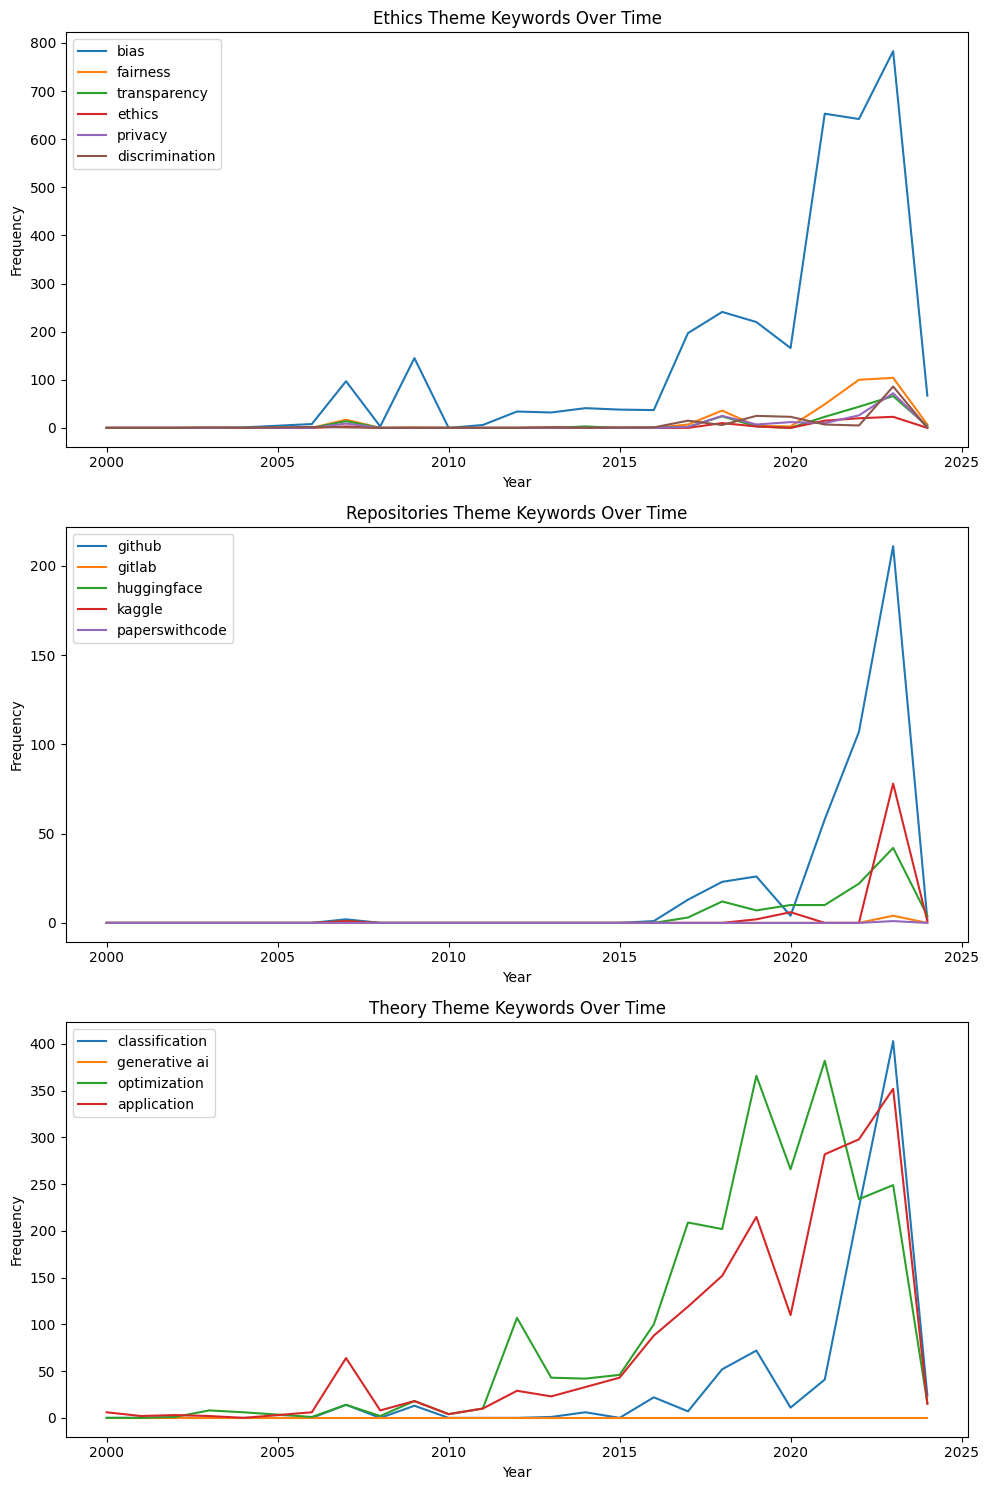

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pip install fuzzywuzzy[speedup]
!pip install wordninja
import pandas as pd
import os
from collections import defaultdict, Counter
import spacy
import nltk
from nltk.corpus import stopwords
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import wordninja
import logging
from tqdm import tqdm

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english')).union({'et', 'al'})

def is_real_word(word):
    """Checks if a word is a real word by splitting it and checking if the split parts are in the English dictionary."""
    split_words = wordninja.split(word)
    return all(split_word in nlp.vocab for split_word in split_words)

def perform_keyword_analysis(text, keywords):
    """Performs keyword analysis on text, using lemmatization and excluding stopwords and non-real words."""
    nlp.max_length = len(text) + 10000
    doc = nlp(text)
    lemmas = [token.lemma_.lower() for token in doc if token.lemma_ not in stop_words and token.pos_ != 'PUNCT' and not token.lemma_.isdigit() and len(token.lemma_) > 1 and not token.lemma_.startswith('/')]
    filtered_lemmas = [lemma for lemma in lemmas if is_real_word(lemma)]
    keyword_counts = {keyword: filtered_lemmas.count(keyword.lower()) for keyword in keywords}
    return keyword_counts

def find_best_match(name, choices, threshold=80):
    """Gets the best match for a given name from a list of choices, with a minimum similarity threshold."""
    match = process.extractOne(name, choices)
    if match:
        best_match, score, _ = match
        if score >= threshold:
            return best_match
    return None

# loads the dataset and extract publication year
pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")
pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

# filters data for years 2000 and onwards
pcd_dataset = pcd_dataset[pcd_dataset['Publication Year'] >= 2000]

# keywords for each theme
themes = {
    'Ethics': ['bias', 'fairness', 'transparency', 'ethics', 'privacy', 'discrimination'],
    'Repositories': ['github', 'gitlab', 'huggingface', 'kaggle', 'paperswithcode'],
    'Theory': ['classification', 'generative ai', 'optimization', 'application']
}

# dictionary to store keyword counts by year for each theme
keywords_counts_by_year = {theme: defaultdict(lambda: defaultdict(int)) for theme in themes}

# preprocesses the System names in the dataset
processed_system_names = pcd_dataset['System'].str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

# goes through the text files and count keywords
text_folder = '/content/drive/My Drive/TextPapers/'
for text_file in tqdm(os.listdir(text_folder)):
    if text_file.endswith('.txt'):
        article_name = text_file.replace('.txt', '').replace('_', ' ')
        best_match = find_best_match(article_name, processed_system_names)
        if best_match is None:
            print(f"Warning: No matching entry found in dataset for text file '{text_file}'")
            continue
        year = pcd_dataset[processed_system_names == best_match]['Publication Year'].values[0]
        with open(f"{text_folder}{text_file}", 'r', encoding='utf-8') as file:
            text = file.read()
            for theme, keywords in themes.items():
                counts = perform_keyword_analysis(text, keywords)
                for keyword, count in counts.items():
                    keywords_counts_by_year[theme][year][keyword] += count

fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, (theme, data) in enumerate(keywords_counts_by_year.items()):
    ax = axs[i]
    for keyword in themes[theme]:
        ax.plot(sorted(data.keys()), [data[year][keyword] for year in sorted(data.keys())], label=keyword)
    ax.set_xlabel('Year')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{theme} Theme Keywords Over Time')
    ax.legend()

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
 11%|█         | 87/780 [14:06<1:28:20,  7.65s/it]

 16%|█▌        | 125/780 [20:46<1:15:40,  6.93s/it]

 23%|██▎       | 177/780 [30:23<1:49:50, 10.93s/it]

 29%|██▊       | 223/780 [38:11<1:37:10, 10.47s/it]

 32%|███▏      | 253/780 [44:12<2:02:23, 13.94s/it]

 43%|████▎     | 337/780 [58:53<1:05:52,  8.92s/it]

 46%|████▌     | 355/780 [1:01:59<1:22:14, 11.61s/it]

 70%|███████   | 548/780 [1:40:19<57:48, 14.95s/it]  

 88%|████████▊ | 686/780 [2:05:06<14:46,  9.43s/it]

100%|██████████| 780/780 [2:22:23<00:00, 10.95s/it]


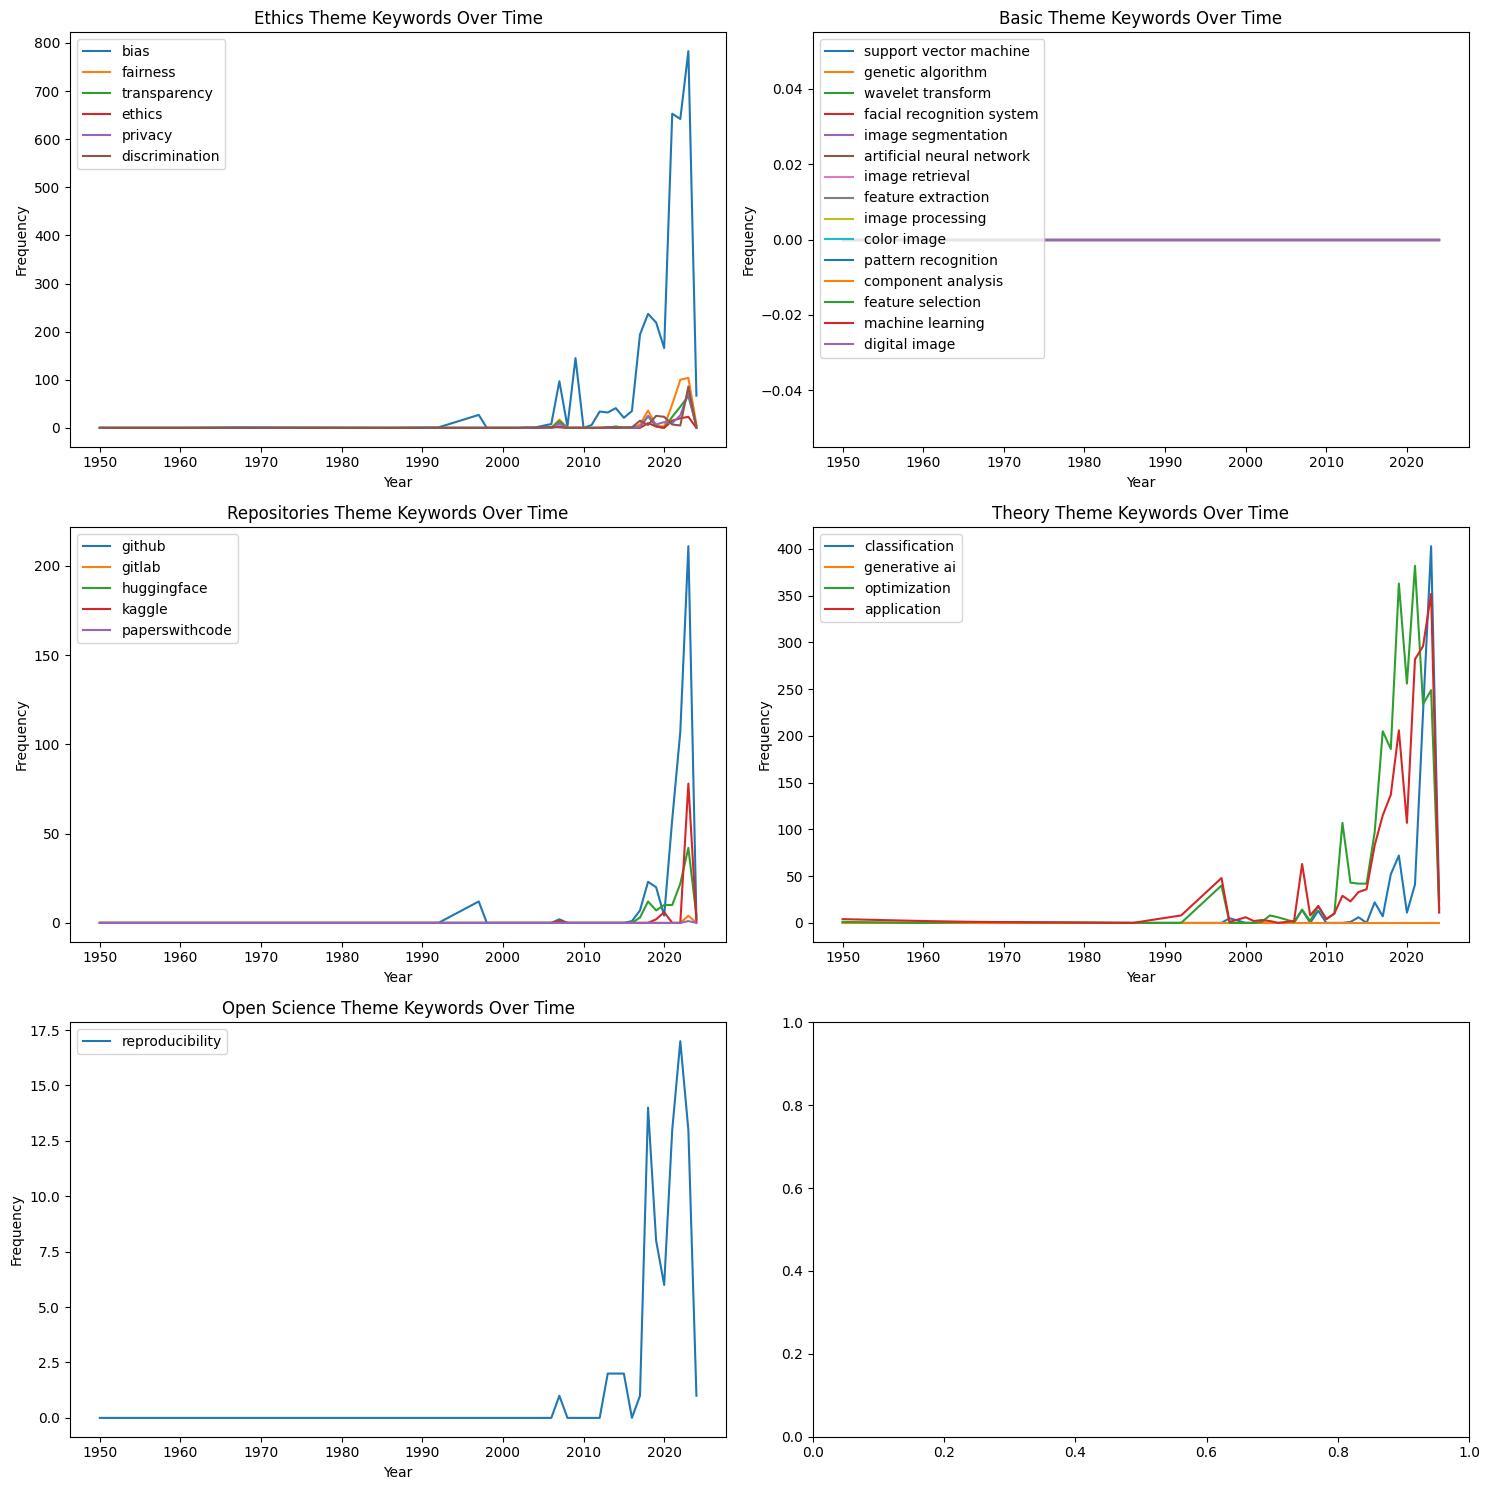

In [ ]:
from google.colab import drive ### older data from mar 19 with some uninformative plots
drive.mount('/content/drive')

!pip install fuzzywuzzy[speedup]
!pip install wordninja
import pandas as pd
import os
from collections import defaultdict, Counter
import spacy
import nltk
from nltk.corpus import stopwords
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import wordninja
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english')).union({'et', 'al'})

def is_real_word(word):
    """Checks if a word is a real word by splitting it and checking if the split parts are in the English dictionary."""
    split_words = wordninja.split(word)
    return all(split_word in nlp.vocab for split_word in split_words)

def perform_keyword_analysis(text, keywords):
    """Performs keyword analysis on text, using lemmatization and excluding stopwords and non-real words."""
    nlp.max_length = len(text) + 10000
    doc = nlp(text)
    lemmas = [token.lemma_.lower() for token in doc if token.lemma_ not in stop_words and token.pos_ != 'PUNCT' and not token.lemma_.isdigit() and len(token.lemma_) > 1 and not token.lemma_.startswith('/')]
    filtered_lemmas = [lemma for lemma in lemmas if is_real_word(lemma)]
    keyword_counts = {keyword: filtered_lemmas.count(keyword.lower()) for keyword in keywords}
    return keyword_counts

def find_best_match(name, choices, threshold=80):
    """Gets the best match for a given name from a list of choices, with a minimum similarity threshold."""
    match = process.extractOne(name, choices)
    if match:
        best_match, score, _ = match
        if score >= threshold:
            return best_match
    return None

# loads the dataset and extract publication year
pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")
pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

# keywords for each theme
themes = {
    'Ethics': ['bias', 'fairness', 'transparency', 'ethics', 'privacy', 'discrimination'],
    'Basic': [
        'support vector machine', 'genetic algorithm', 'wavelet transform', 'facial recognition system',
        'image segmentation', 'artificial neural network', 'image retrieval', 'feature extraction',
        'image processing', 'color image', 'pattern recognition', 'component analysis', 'feature selection',
        'machine learning', 'digital image', 'reinforcement learning', 'motion estimation', 'image registration',
        'bayesian network', 'self organization', 'edge detection', 'artificial intelligence', 'image sequence',
        'face detection', 'decision tree', 'image quality', 'object detection', 'neuro fuzzy', 'image enhancement',
        'machine translation', 'convolutional neural network', 'deep learning', 'deep neural network',
        'feature selection', 'feature extraction', 'object detection', 'image segmentation', 'artificial neural network',
        'support vector machine', 'reinforcement learning', 'facial recognition system', 'hyperspectral imaging',
        'image processing', 'sentiment analysis', 'generative adversarial network', 'learning model',
        'recurrent neural network', 'wavelet transform', 'image retrieval', 'point cloud', 'natural language',
        'action recognition', 'genetic algorithm', 'pattern recognition', 'machine translation', 'learning machine',
        'image quality', 'color image'
    ],
    'Repositories': ['github', 'gitlab', 'huggingface', 'kaggle', 'paperswithcode'],
    'Theory': ['classification', 'generative ai', 'optimization', 'application'],
    'Open Science': ['open data', 'open access', 'data sharing', 'open source', 'data availability', 'reproducibility', 'data repository', 'open science', 'data reuse', 'open research', 'open methodology', 'open scholarship', 'open infrastructure', 'open standards', 'open practices']
}

# dictionary to store keyword counts by year for each theme
keywords_counts_by_year = {theme: defaultdict(lambda: defaultdict(int)) for theme in themes}

# preprocesses the System names in the dataset
processed_system_names = pcd_dataset['System'].str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

# goes through the text files and count keywords
text_folder = '/content/drive/My Drive/TextPapers/'
for text_file in tqdm(os.listdir(text_folder)):
    if text_file.endswith('.txt'):
        article_name = text_file.replace('.txt', '').replace('_', ' ')
        best_match = find_best_match(article_name, processed_system_names)
        if best_match is None:
            print(f"Warning: No matching entry found in dataset for text file '{text_file}'")
            continue
        year = pcd_dataset[processed_system_names == best_match]['Publication Year'].values[0]
        with open(f"{text_folder}{text_file}", 'r', encoding='utf-8') as file:
            text = file.read()
            for theme, keywords in themes.items():
                counts = perform_keyword_analysis(text, keywords)
                for keyword, count in counts.items():
                    keywords_counts_by_year[theme][year][keyword] += count

# gets the difference in frequency for each keyword in the 'Basic' theme
basic_theme_data = keywords_counts_by_year['Basic']
keyword_max_frequencies = {}
for keyword in themes['Basic']:
    keyword_max_frequencies[keyword] = max(basic_theme_data[year][keyword] for year in basic_theme_data)

# Sort the keywords by their maximum frequencies and select the top 15
top_keywords = sorted(keyword_max_frequencies, key=keyword_max_frequencies.get, reverse=True)[:15]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i, (theme, data) in enumerate(keywords_counts_by_year.items()):
    ax = axs[i//2, i%2]
    if theme == 'Basic':
        # Plot only the top 15 keywords for the 'Basic' theme
        for keyword in top_keywords:
            ax.plot(sorted(data.keys()), [data[year][keyword] for year in sorted(data.keys())], label=keyword)
    elif theme == 'Open Science':
        # Collect keywords for which data is available
        available_keywords = [keyword for keyword in themes[theme] if any(data[year][keyword] for year in data)]
        # Plot the available keywords
        for keyword in available_keywords:
            ax.plot(sorted(data.keys()), [data[year][keyword] for year in sorted(data.keys())], label=keyword)
    else:
        # Plot all keywords for other themes
        for keyword in themes[theme]:
            ax.plot(sorted(data.keys()), [data[year][keyword] for year in sorted(data.keys())], label=keyword)
    ax.set_xlabel('Year')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{theme} Theme Keywords Over Time')
    ax.legend()

plt.tight_layout()
plt.show()



In [ ]:
from google.colab import drive ### new mar 19
drive.mount('/content/drive')

!pip install fuzzywuzzy[speedup]
!pip install wordninja
import pandas as pd
import os
from collections import defaultdict, Counter
import spacy
import nltk
from nltk.corpus import stopwords
from fuzzywuzzy import process
import matplotlib.pyplot as plt
import wordninja
import logging

logging.getLogger('matplotlib.font_manager').disabled = True  # gets rid of warning messages w fonts

#times new roman free alternative font
!sudo mv Tinos-Regular.ttf /usr/share/fonts/truetype/
!sudo fc-cache -fv
plt.rcParams['font.family'] = 'Tinos'

nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english')).union({'et', 'al'})

def is_real_word(word):
    """Checks if a word is a real word by splitting it and checking if the split parts are in the English dictionary."""
    split_words = wordninja.split(word)
    return all(split_word in nlp.vocab for split_word in split_words)

def perform_keyword_analysis(text, keywords):
    """Performs keyword analysis on text, using lemmatization and excluding stopwords and non-real words."""
    nlp.max_length = len(text) + 10000
    doc = nlp(text)
    lemmas = [token.lemma_.lower() for token in doc if token.lemma_ not in stop_words and token.pos_ != 'PUNCT' and not token.lemma_.isdigit() and len(token.lemma_) > 1 and not token.lemma_.startswith('/')]
    filtered_lemmas = [lemma for lemma in lemmas if is_real_word(lemma)]
    keyword_counts = {keyword: filtered_lemmas.count(keyword.lower()) for keyword in keywords}
    return keyword_counts

def find_best_match(name, choices, threshold=80):
    """Gets the best match for a given name from a list of choices, with a minimum similarity threshold."""
    match = process.extractOne(name, choices)
    if match:
        best_match, score, _ = match
        if score >= threshold:
            return best_match
    return None

# loads the dataset and extract publication year
pcd_dataset = pd.read_csv("https://epochai.org/data/epochdb/all_systems.csv")
pcd_dataset['Publication Year'] = pd.to_datetime(pcd_dataset['Publication date']).dt.year

# keywords for each theme
themes = {
    'Ethics': ['bias', 'fairness', 'transparency', 'ethics', 'privacy', 'discrimination'],
    'Basic': [
        'support vector machine', 'genetic algorithm', 'wavelet transform', 'facial recognition system',
        'image segmentation', 'artificial neural network', 'image retrieval', 'feature extraction',
        'image processing', 'color image', 'pattern recognition', 'component analysis', 'feature selection',
        'machine learning', 'digital image', 'reinforcement learning', 'motion estimation', 'image registration',
        'bayesian network', 'self organization', 'edge detection', 'artificial intelligence', 'image sequence',
        'face detection', 'decision tree', 'image quality', 'object detection', 'neuro fuzzy', 'image enhancement',
        'machine translation', 'convolutional neural network', 'deep learning', 'deep neural network',
        'feature selection', 'feature extraction', 'object detection', 'image segmentation', 'artificial neural network',
        'support vector machine', 'reinforcement learning', 'facial recognition system', 'hyperspectral imaging',
        'image processing', 'sentiment analysis', 'generative adversarial network', 'learning model',
        'recurrent neural network', 'wavelet transform', 'image retrieval', 'point cloud', 'natural language',
        'action recognition', 'genetic algorithm', 'pattern recognition', 'machine translation', 'learning machine',
        'image quality', 'color image'
    ],
    'Repositories': ['github', 'gitlab', 'huggingface', 'kaggle', 'paperswithcode'],
    'Theory': ['classification', 'generative ai', 'optimization', 'application'],
    'Open Science': ['open data', 'open access', 'data sharing', 'open source', 'data availability', 'reproducibility', 'data repository', 'open science', 'data reuse', 'open research', 'open methodology', 'open scholarship', 'open infrastructure', 'open standards', 'open practices']
}

# dictionary to store keyword counts by year for each theme
keywords_counts_by_year = {theme: defaultdict(lambda: defaultdict(int)) for theme in themes}

# preprocesses the System names in the dataset
processed_system_names = pcd_dataset['System'].str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

# goes through the text files and count keywords
text_folder = '/content/drive/My Drive/TextPapers/'
for text_file in tqdm(os.listdir(text_folder)):
    if text_file.endswith('.txt'):
        article_name = text_file.replace('.txt', '').replace('_', ' ')
        best_match = find_best_match(article_name, processed_system_names)
        if best_match is None:
            print(f"Warning: No matching entry found in dataset for text file '{text_file}'")
            continue
        year = pcd_dataset[processed_system_names == best_match]['Publication Year'].values[0]
        with open(f"{text_folder}{text_file}", 'r', encoding='utf-8') as file:
            text = file.read()
            for theme, keywords in themes.items():
                counts = perform_keyword_analysis(text, keywords)
                for keyword, count in counts.items():
                    keywords_counts_by_year[theme][year][keyword] += count

# gets the difference in frequency for each keyword in the 'Basic' theme
basic_theme_data = keywords_counts_by_year['Basic']
keyword_max_frequencies = {}
for keyword in themes['Basic']:
    keyword_max_frequencies[keyword] = max(basic_theme_data[year][keyword] for year in basic_theme_data)

# Sort the keywords by their maximum frequencies and select the top 15
top_keywords = sorted(keyword_max_frequencies, key=keyword_max_frequencies.get, reverse=True)[:15]

fig, axs = plt.subplots(3, 2, figsize=(15, 15))
for i, (theme, data) in enumerate(keywords_counts_by_year.items()):
    ax = axs[i//2, i%2]
    if theme == 'Basic':
        # Plot only the top 15 keywords for the 'Basic' theme
        for keyword in top_keywords:
            ax.plot(sorted(data.keys()), [data[year][keyword] for year in sorted(data.keys())], label=keyword)
    elif theme == 'Open Science':
        # Collect keywords for which data is available
        available_keywords = [keyword for keyword in themes[theme] if any(data[year][keyword] for year in data)]
        # Plot the available keywords
        for keyword in available_keywords:
            ax.plot(sorted(data.keys()), [data[year][keyword] for year in sorted(data.keys())], label=keyword)
    else:
        # Plot all keywords for other themes
        for keyword in themes[theme]:
            ax.plot(sorted(data.keys()), [data[year][keyword] for year in sorted(data.keys())], label=keyword)
    ax.set_xlabel('Year')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{theme} Theme Keywords Over Time')
    ax.legend()

plt.tight_layout()
plt.show()
